# MD004 ENTREGA6 ANÁLISIS DE COMPONENTES PRINCIPALES

**Descripción de la tarea:**

El fichero 20230119_DatosBoston incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos. La descripción de las columnas del dataset es la que sigue:

- **crime_index**: Índice de criminalidad de la zona
- **urban_ratio**: Ratio de zona urbana residencial sobre el total
- **industry_ratio**: Ratio de industria de la zona
- **c_river_variable**: 1 si la zona colinda con un río y 0 si no
- **nox_concentration**: Concentración de óxido nitroso en la zona
- **rooms_per_dwelling**: Número de habitaciones medio por vivienda
- **dwelling_age**: “Edad” media de la vivienda
- **dwelling_dist**: Distancia media ponderada con los centros urbanos de la ciudad
- **highway_index**: Índice de accesibilidad sobre autopistas cercanas
- **tax_ratio**: Índice de tasas por cada 10000usd
- **teacher_ratio**: Ratio de alumno por profesor
- **racial_index**: Índice de proporción de población no caucásica
- **lower_status**: Porcentaje de población de “clase-baja”
- **median_value**: Valor medio de precio de la vivienda (En 1000USD)

**Se pide:**

1. **Visualización y familiarización del dataset (2p)**: Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.
2. **Análisis de correlación y de componentes principales (3p)**: Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación
3. **Análisis de ANOVA (2p)**: Se valorará principalmente la interpretación del análisis, así como la limpieza de los datos
4. **Desarrollo y justificación de las variables (1p)**: En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?
5. **Estudio de regresión lineal del median_value (2p)**: ¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?  

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC06.ipynb y fichero .pdf con MD004NombreApellidosAC04.pdf** </font>

# 1. Carga de Paquetes y Librerías

In [127]:
install.packages('gridExtra')
install.packages('GGally')
install.packages('nortest')
install.packages('olsrr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘pbkrtest’, ‘lme4’, ‘car’




In [45]:
install.packages('corrplot')
install.packages('caret')
install.packages('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [52]:
library(dplyr)
library(MASS)
library(class)
library(ggplot2)
library(gridExtra)
library(GGally)
library(nortest)
library(MASS)
library(corrplot)
library(caret)
library(lmtest)
library(broom)

# 2. Carga de Datos y Familiarización

In [3]:
boston = read.csv(file='20230119_DatosBoston.csv',header=TRUE, sep=';', dec='.')

In [2]:
head(boston)
tail(boston)

ERROR: Error in eval(expr, envir, enclos): object 'boston' not found


In [ ]:
str(boston)

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [ ]:
sum(is.na(boston))

[1] 0

In [ ]:
summary(boston)

  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12

Empezamos cargando los datos, visualizando sus principales estadísticos e investigando sus posibles valores nulos.

Para empezar vemos que es un data set con 14 variables y en el que usaremos la variable median_value como variable objetivo. Vamos a intentar predecir el valor medio de los apartamentos en la ciudad de Boston.

Tenemos 4 variables del tipo 'integer' una de ellas es una variable binaria que nos da información sobre la cercanía al río de los apartamentos en cuestión. El resto son variables numéricas.

Al buscar los NAs, nos damos cuenta de que no existen, nuestro data set tiene un total de 0 NAs, así que podremos seguir trabajando sin la necesidad de tratarlos.

Por otro lado, al analizar los estadísticos podemos observar los cuartiles, la media y la mediana de las variables y empezar a intuir la dispersión de estas, así como sus sesgos.

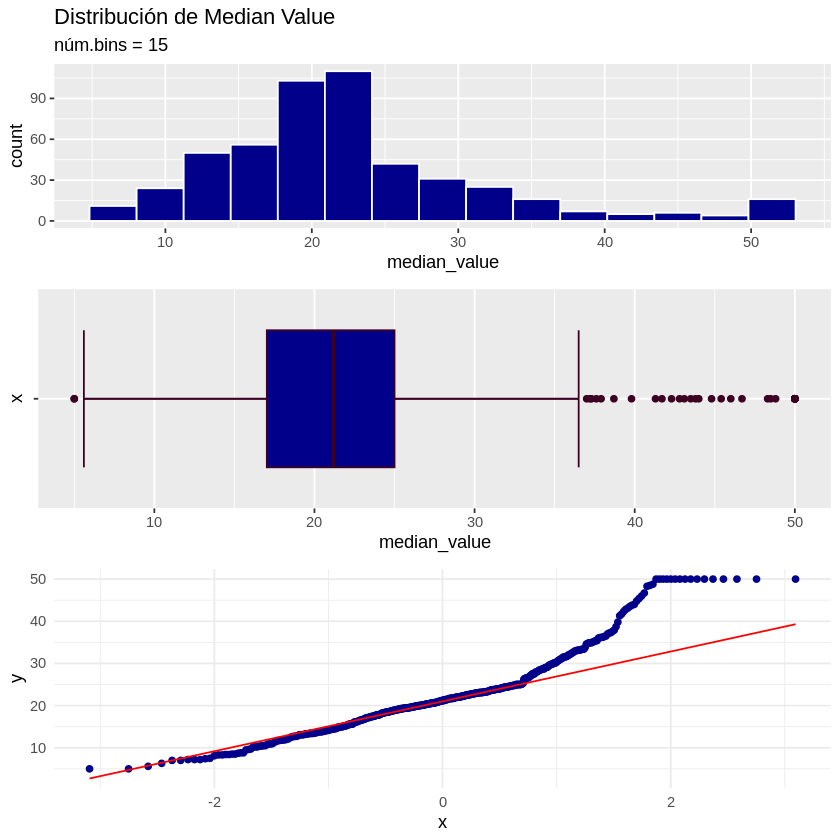

In [108]:
a= ggplot(boston) +
  aes(x = median_value) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Median Value"  ,subtitle = "núm.bins = 15",x = "median_value")
b= ggplot(data = boston, aes(x = "", y = median_value)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
c  <- ggplot(data = boston, aes(sample = median_value)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()
grid.arrange(a,b,c)

A continuación, hemos querido empezar el análisis visual con la variable objetivo. En los gráficos podemos ver que tiende a una distribución normal, pero que está un poco sesgada a la izquierda (de hecho, en el qqplot observamos que parece normal hasta que llega a la parte derecha de la distribución), observamos una gran cantidad de 'outliers' según el gráfico boxplot que habría que intentar entender para tener mayor conocimiento del dominio.

Si bien, es cierto que los precios de los apartamentos tienen un mínimo razonable, pero que el máximo es más difícil de predecir porque siempre se puede hacer casas más grandes, más modernas, mejor ubicadas, con más facilidades... en definitiva, más caras.

In [ ]:
# Comparar con las medias del summary para ver que pasa en los outliers de median_value

head(subset(boston, median_value > 40))


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
99,0.08187,0,2.89,0,0.445,7.820,36.9,34.952,2,276,18.0,393.53,3.57,43.8
158,122.35800,0,19.58,0,0.605,6.943,97.4,18.773,5,403,14.7,363.43,4.59,41.3
162,146.33600,0,19.58,0,0.605,7.489,90.8,19.709,5,403,14.7,374.43,1.73,50.0
163,183.37700,0,19.58,1,0.605,7.802,98.2,20.407,5,403,14.7,389.61,1.92,50.0
164,151.90200,0,19.58,1,0.605,8.375,93.9,2.162,5,403,14.7,388.45,3.32,50.0
167,201.01900,0,19.58,0,0.605,7.929,96.2,20.459,5,403,14.7,369.30,3.70,50.0


In [ ]:
outliers <- subset(boston, median_value > 40)

summary(outliers)

  crime_index        urban_ratio   industry_ratio   c_river_variable
 Min.   :  0.0138   Min.   : 0.0   Min.   : 0.460   Min.   :0.0000  
 1st Qu.:  0.0587   1st Qu.: 0.0   1st Qu.: 3.330   1st Qu.:0.0000  
 Median :  0.5269   Median : 0.0   Median : 5.860   Median :0.0000  
 Mean   :110.9772   Mean   :22.4   Mean   : 8.707   Mean   :0.2258  
 3rd Qu.:134.3470   3rd Qu.:20.0   3rd Qu.:18.100   3rd Qu.:0.0000  
 Max.   :826.7250   Max.   :95.0   Max.   :19.580   Max.   :1.0000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist   
 Min.   :0.3940    Min.   :4.970      Min.   :  8.40   Min.   : 1.801  
 1st Qu.:0.4429    1st Qu.:7.479      1st Qu.: 35.55   1st Qu.:11.493  
 Median :0.5070    Median :7.820      Median : 73.30   Median :20.459  
 Mean   :0.5338    Mean   :7.647      Mean   : 66.28   Mean   :25.175  
 3rd Qu.:0.6180    3rd Qu.:8.253      3rd Qu.: 92.70   3rd Qu.:34.352  
 Max.   :0.6680    Max.   :8.725      Max.   :100.00   Max.   :89.067  
 highway_inde

Para analizar las outliers que comentábamos, una opción sería empezar por aquí, visualizarlos, y hacernos una idea de qué características tienen. Aquí tenemos todos los apartamentos con un valor mediano mayor a 40, que es la zona donde hay muchos de estos outliers.

Con el summary de outliers, podemos observar un poco más sus estadísticos y ver las variaciones con respecto a los de la población total. Por ejemplo, la mediana del índice de crimen se ve reducida.

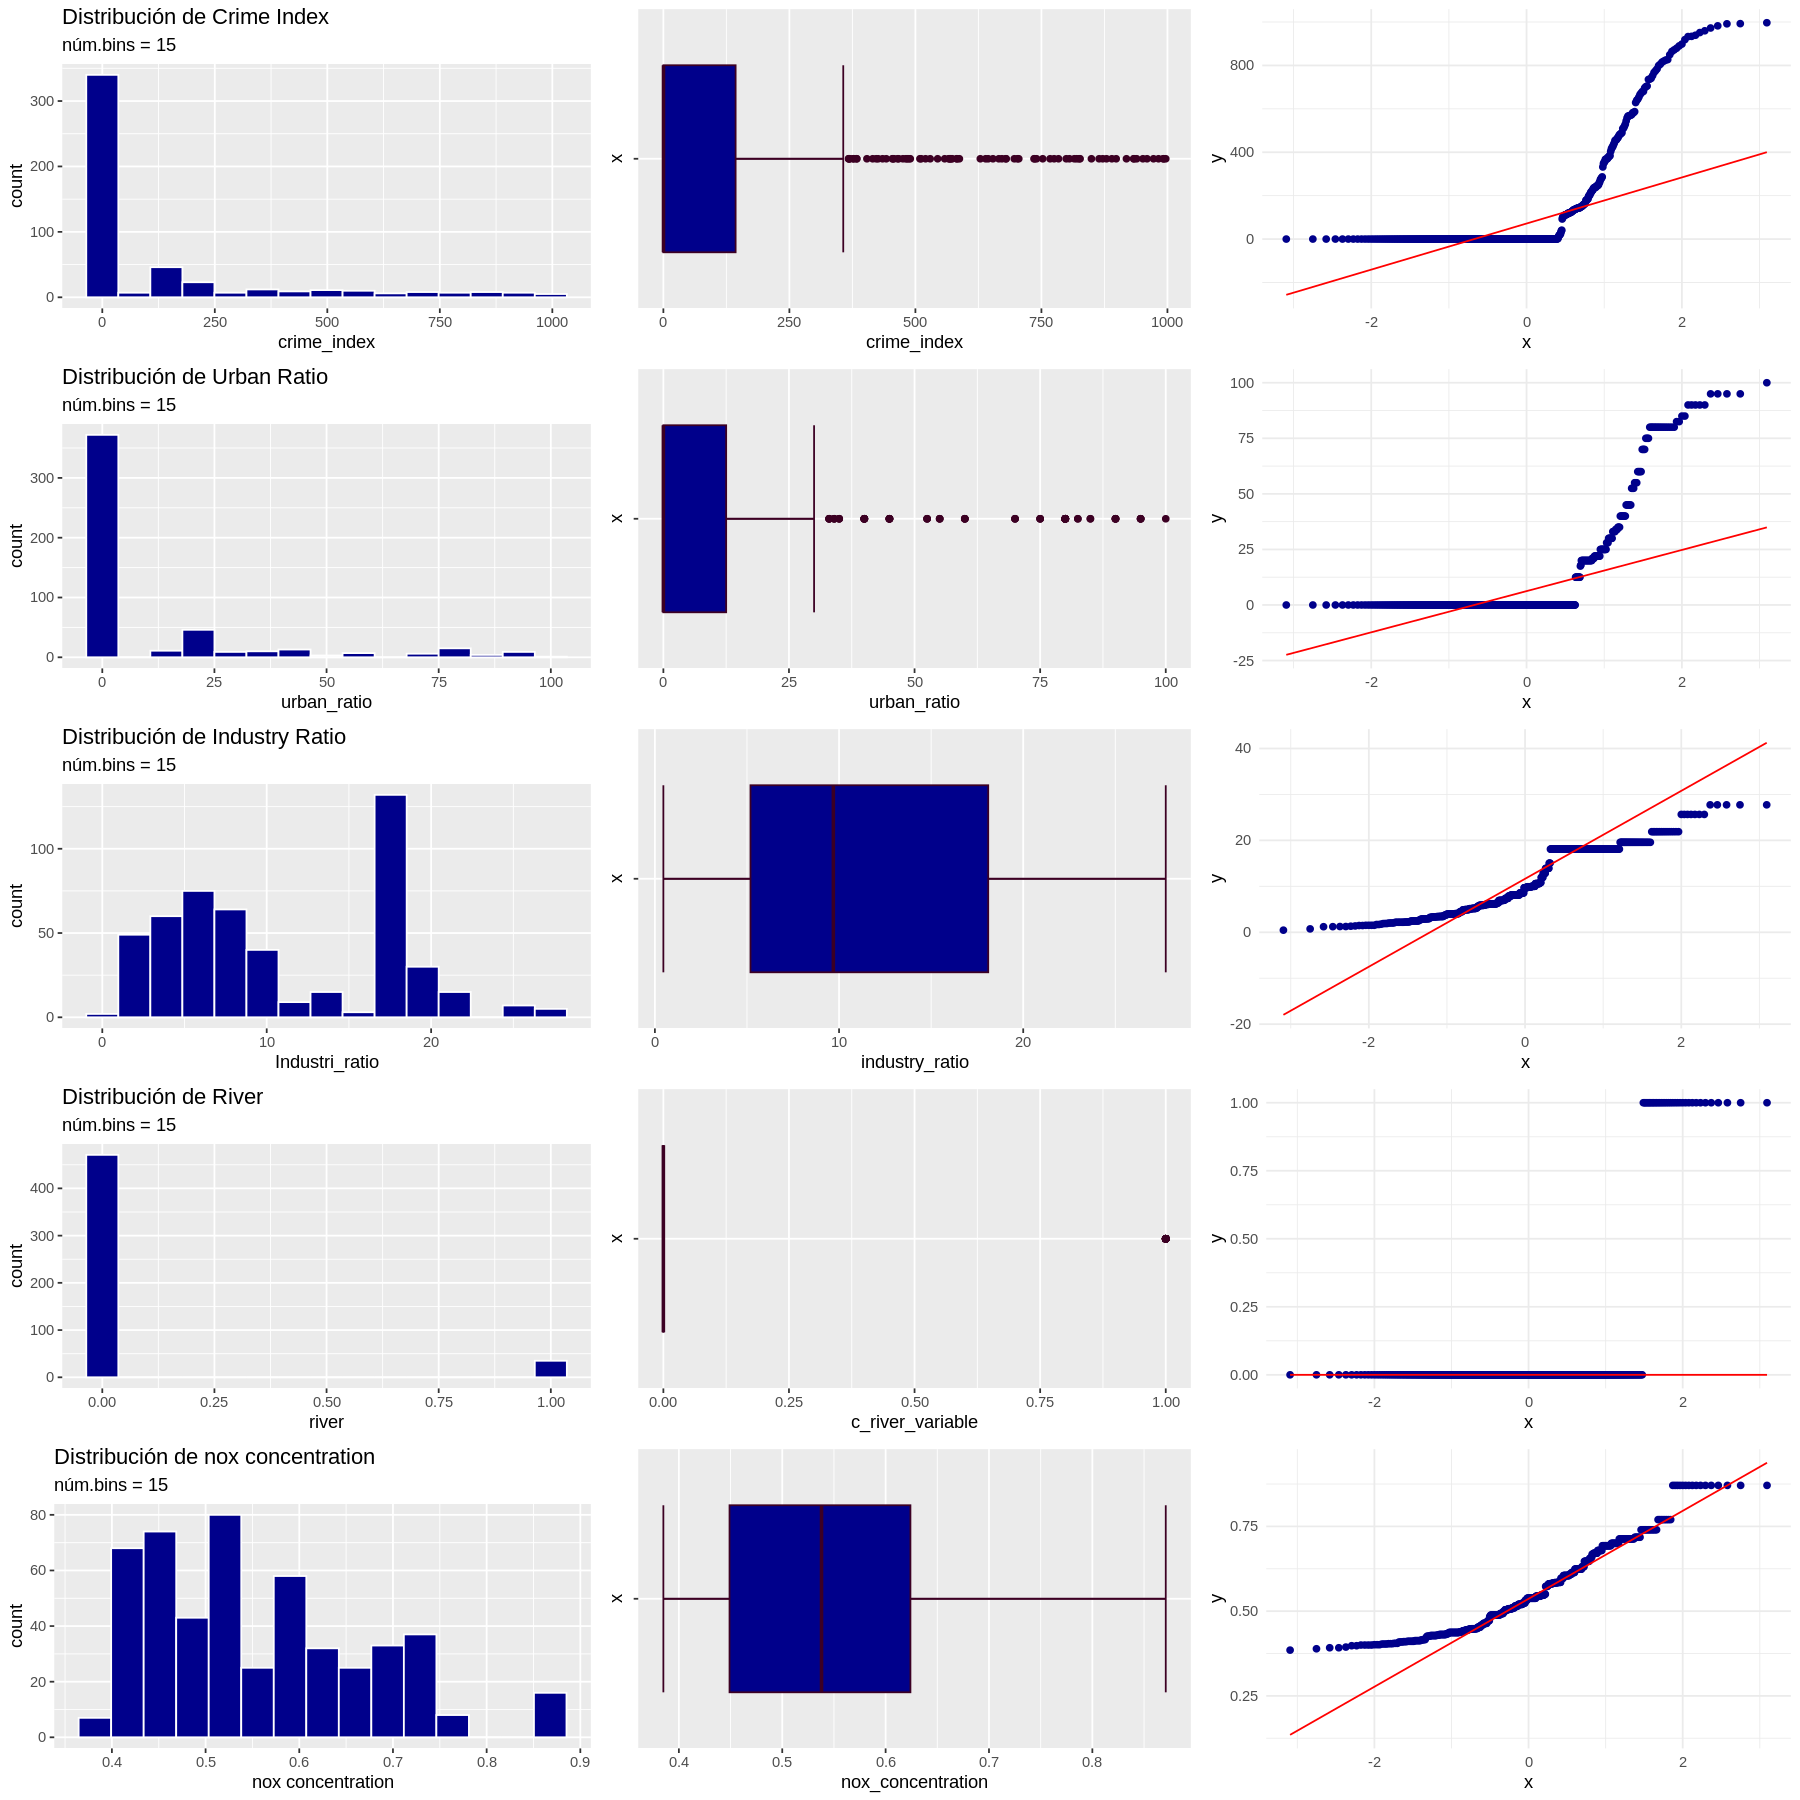

In [111]:
options(
  repr.plot.width = 15,
  repr.plot.height = 15
)

a= ggplot(boston) +
  aes(x = crime_index) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Crime Index"  ,subtitle = "núm.bins = 15",x = "crime_index")
b= ggplot(data = boston, aes(x = "", y = crime_index)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
c= ggplot(data = boston, aes(sample = crime_index)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

d= ggplot(boston) +
  aes(x = urban_ratio) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Urban Ratio"  ,subtitle = "núm.bins = 15",x = "urban_ratio")
e= ggplot(data = boston, aes(x = "", y = urban_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
f= ggplot(data = boston, aes(sample = urban_ratio)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

g= ggplot(boston) +
  aes(x = industry_ratio) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Industry Ratio"  ,subtitle = "núm.bins = 15",x = "Industri_ratio")
h= ggplot(data = boston, aes(x = "", y = industry_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
i= ggplot(data = boston, aes(sample = industry_ratio)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

j= ggplot(boston) +
  aes(x = c_river_variable) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de River"  ,subtitle = "núm.bins = 15",x = "river")
k= ggplot(data = boston, aes(x = "", y = c_river_variable)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
l= ggplot(data = boston, aes(sample = c_river_variable)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

m= ggplot(boston) +
  aes(x = nox_concentration) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de nox concentration"  ,subtitle = "núm.bins = 15",x = "nox concentration")
n= ggplot(data = boston, aes(x = "", y = nox_concentration)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
o= ggplot(data = boston, aes(sample = nox_concentration)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

grid.arrange(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o, ncol = 3)



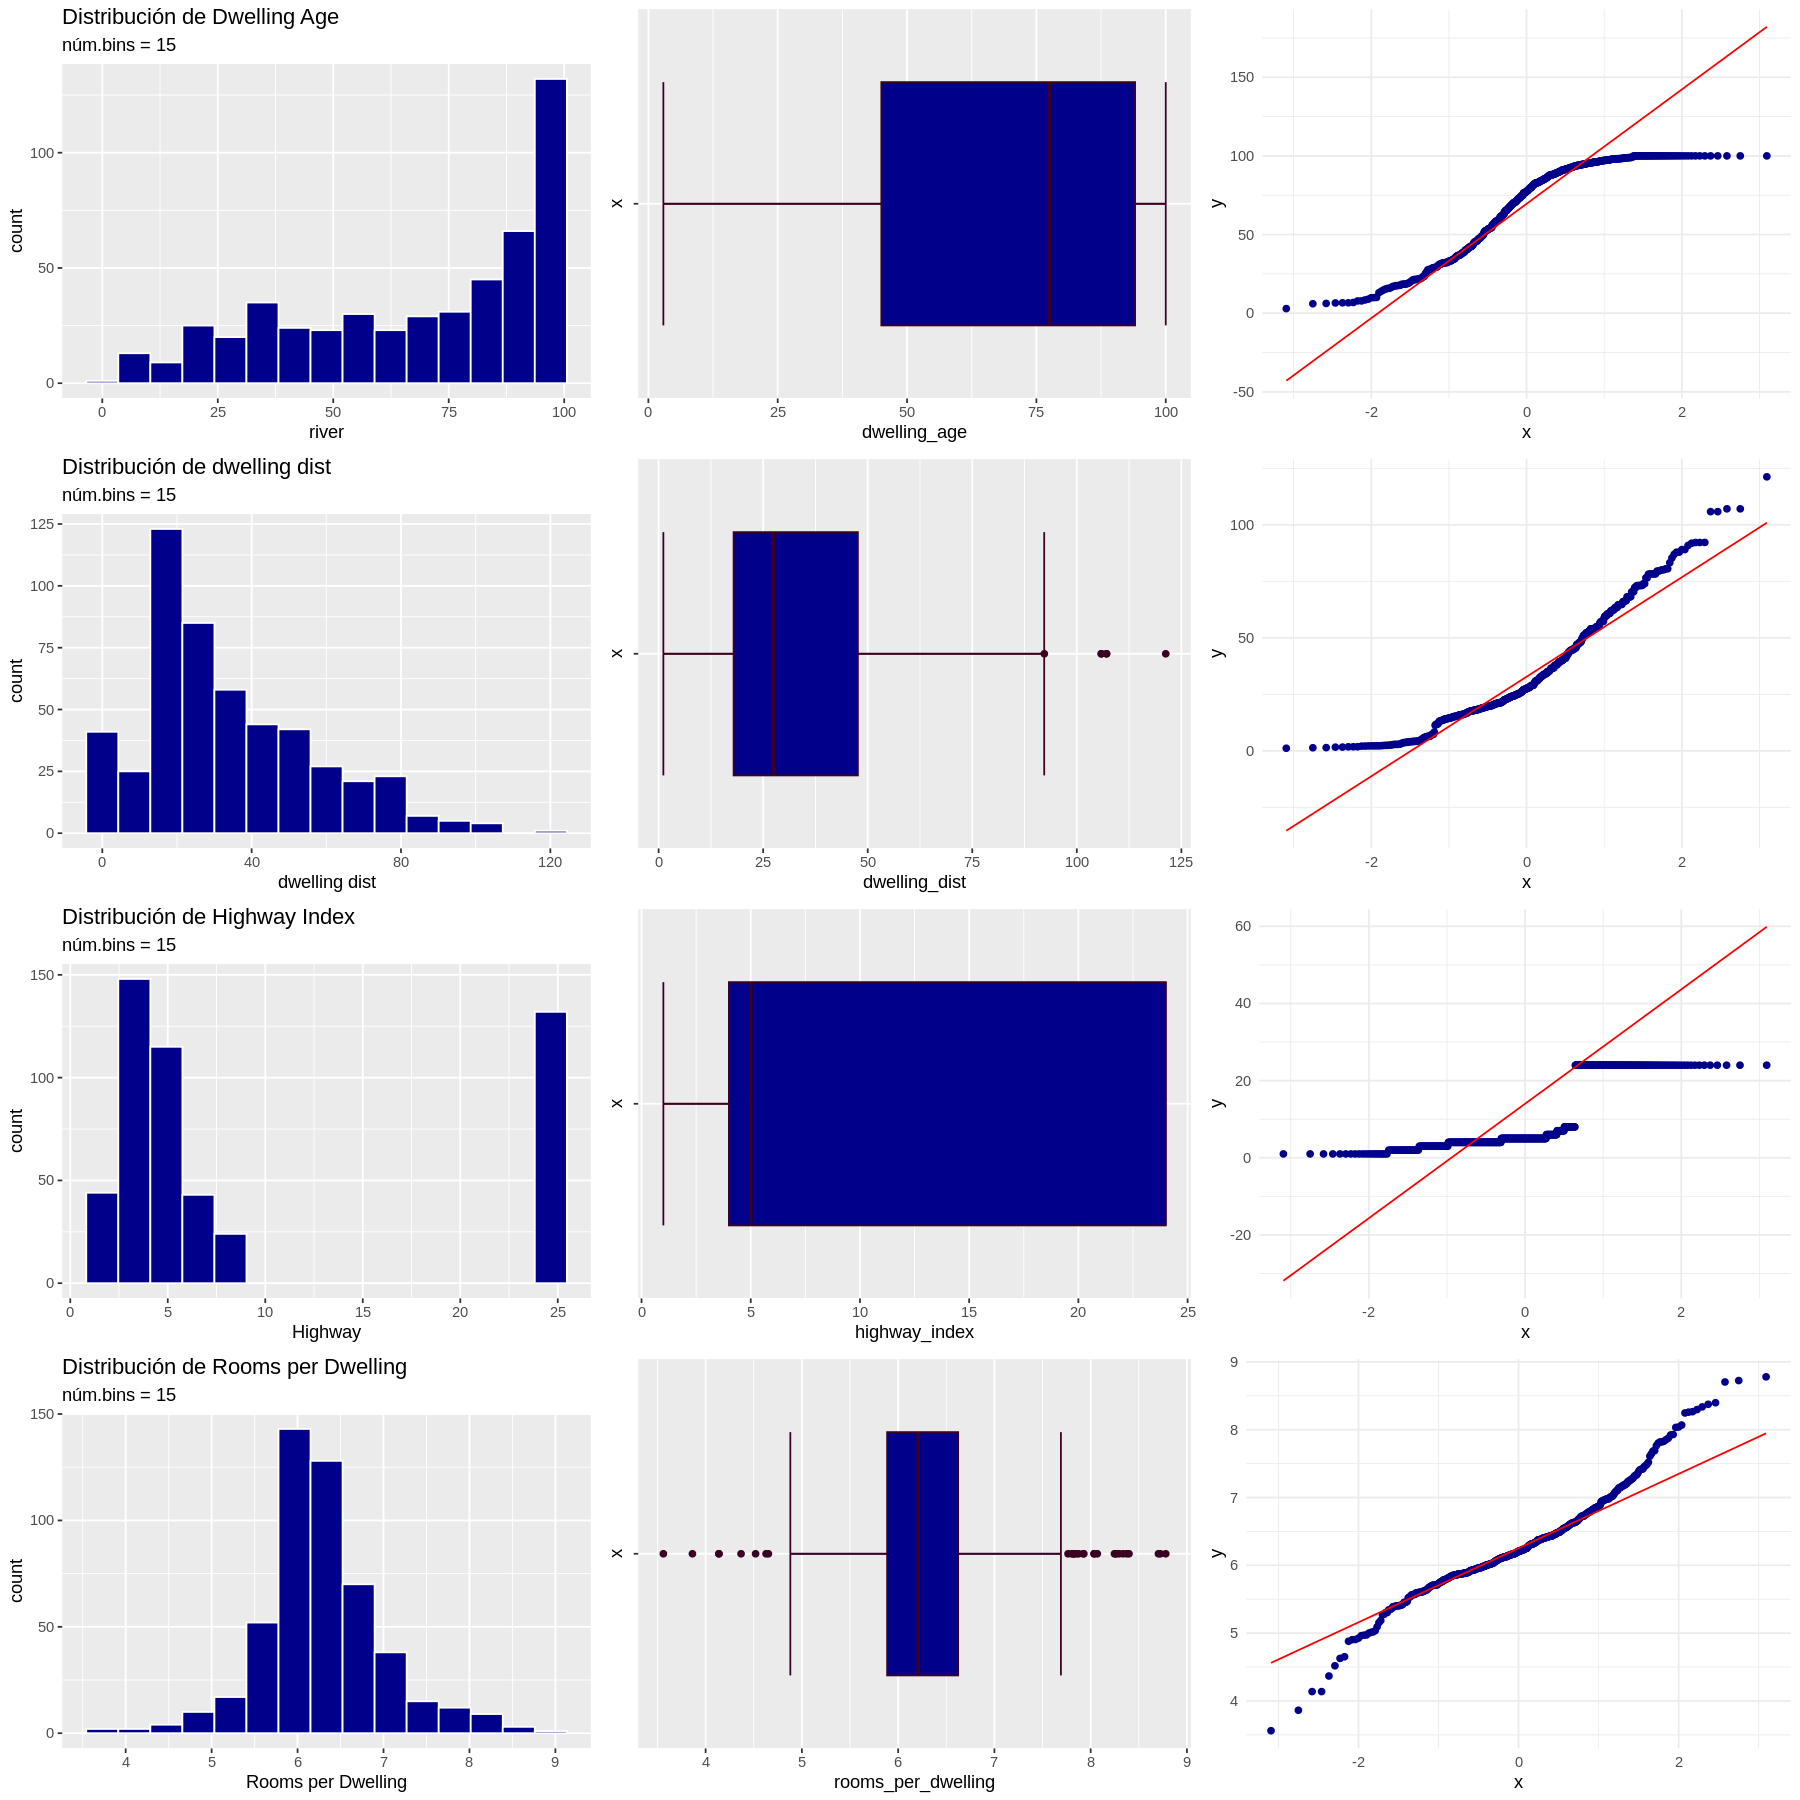

In [112]:
a= ggplot(boston) +
  aes(x = dwelling_age) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Dwelling Age"  ,subtitle = "núm.bins = 15",x = "river")
b= ggplot(data = boston, aes(x = "", y = dwelling_age)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
c= ggplot(data = boston, aes(sample = dwelling_age)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

d= ggplot(boston) +
  aes(x = dwelling_dist) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de dwelling dist"  ,subtitle = "núm.bins = 15",x = "dwelling dist")
e= ggplot(data = boston, aes(x = "", y = dwelling_dist)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
f= ggplot(data = boston, aes(sample = dwelling_dist)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

g= ggplot(boston) +
  aes(x = highway_index) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Highway Index"  ,subtitle = "núm.bins = 15",x = "Highway")
h= ggplot(data = boston, aes(x = "", y = highway_index)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
i= ggplot(data = boston, aes(sample = highway_index)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

j= ggplot(boston) +
  aes(x = rooms_per_dwelling) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Rooms per Dwelling"  ,subtitle = "núm.bins = 15",x = "Rooms per Dwelling")
k= ggplot(data = boston, aes(x = "", y = rooms_per_dwelling)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
l= ggplot(data = boston, aes(sample = rooms_per_dwelling)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

grid.arrange(a,b,c,d,e,f,g,h,i,j,k,l, ncol = 3)

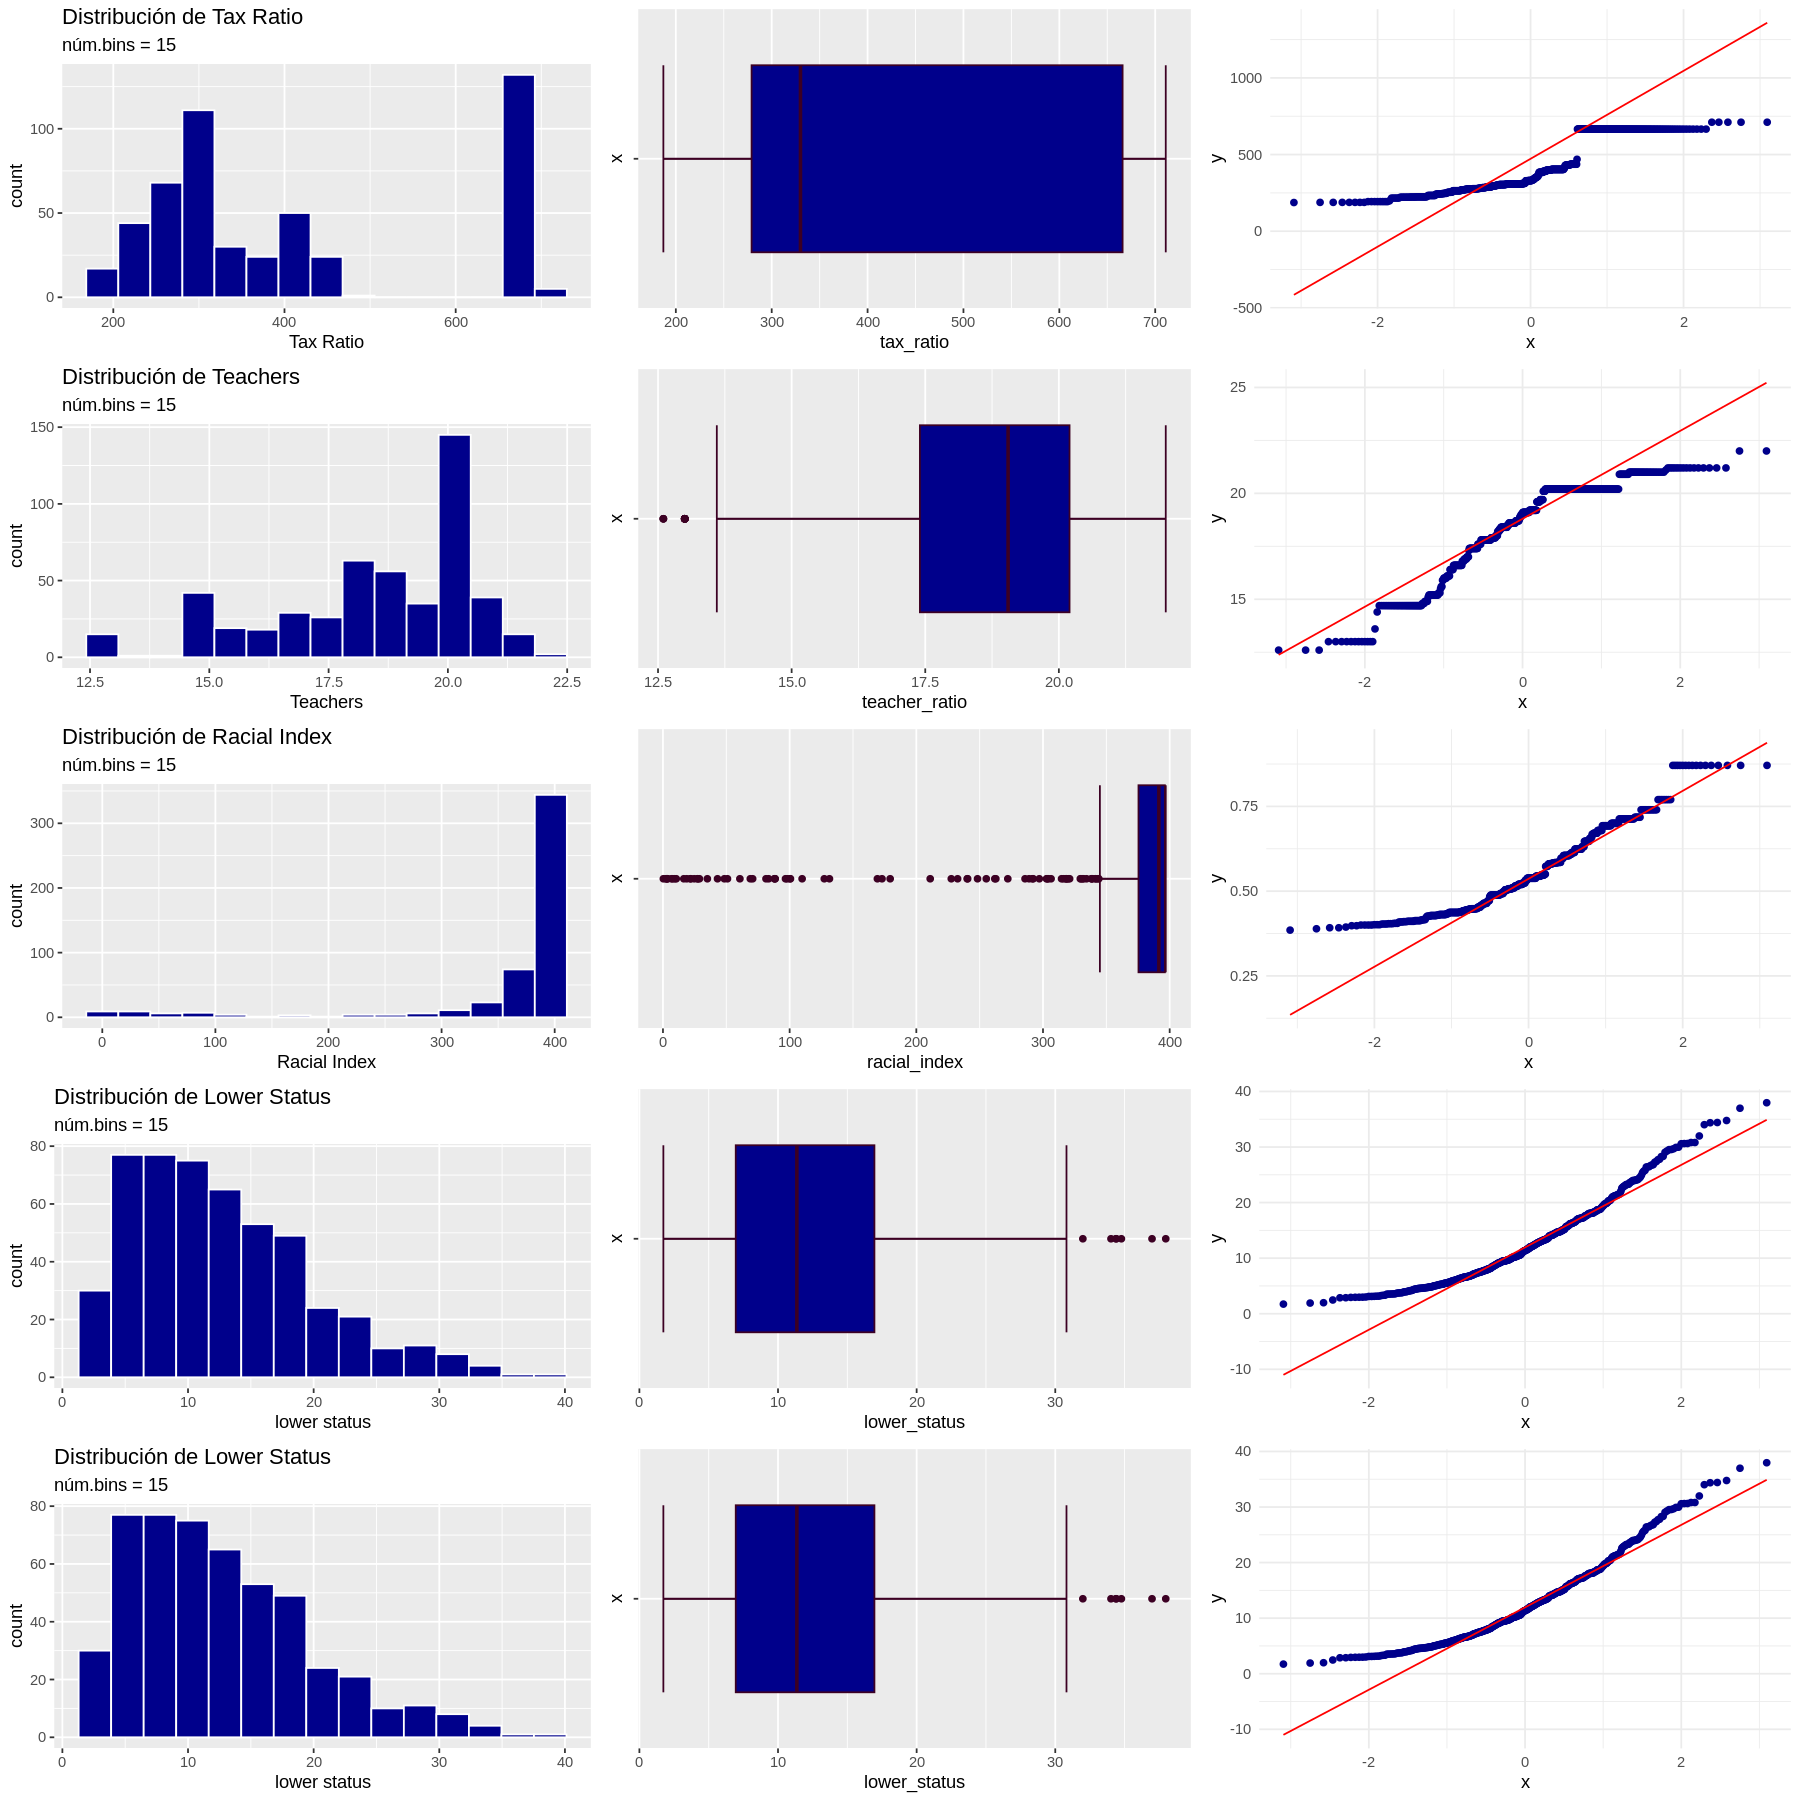

In [114]:
a= ggplot(boston) +
  aes(x = tax_ratio) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Tax Ratio"  ,subtitle = "núm.bins = 15",x = "Tax Ratio")
b= ggplot(data = boston, aes(x = "", y = tax_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
c= ggplot(data = boston, aes(sample = tax_ratio)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

d= ggplot(boston) +
  aes(x = teacher_ratio) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Teachers"  ,subtitle = "núm.bins = 15",x = "Teachers")
e= ggplot(data = boston, aes(x = "", y = teacher_ratio)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
f= ggplot(data = boston, aes(sample = teacher_ratio)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

g= ggplot(boston) +
  aes(x = racial_index) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Racial Index"  ,subtitle = "núm.bins = 15",x = "Racial Index")
h= ggplot(data = boston, aes(x = "", y = racial_index)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
i= ggplot(data = boston, aes(sample = nox_concentration)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

j= ggplot(boston) +
  aes(x = lower_status) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Lower Status"  ,subtitle = "núm.bins = 15",x = "lower status")
k= ggplot(data = boston, aes(x = "", y = lower_status)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
l= ggplot(data = boston, aes(sample = lower_status)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()

m= ggplot(boston) +
  aes(x = lower_status) +
  geom_histogram(bins = 15 ,fill = "darkblue",color = "white") +
  labs(title="Distribución de Lower Status"  ,subtitle = "núm.bins = 15",x = "lower status")
n= ggplot(data = boston, aes(x = "", y = lower_status)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "darkblue",color = "#3c0023") +
       coord_flip()
o= ggplot(data = boston, aes(sample = lower_status)) +
  geom_qq(color = "darkblue") +
  geom_qq_line(color = "red") +
  theme_minimal()


grid.arrange(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o, ncol = 3)

# 3. Análisis de Correlaciones y Componentes

- **3.1. Correlaciones**

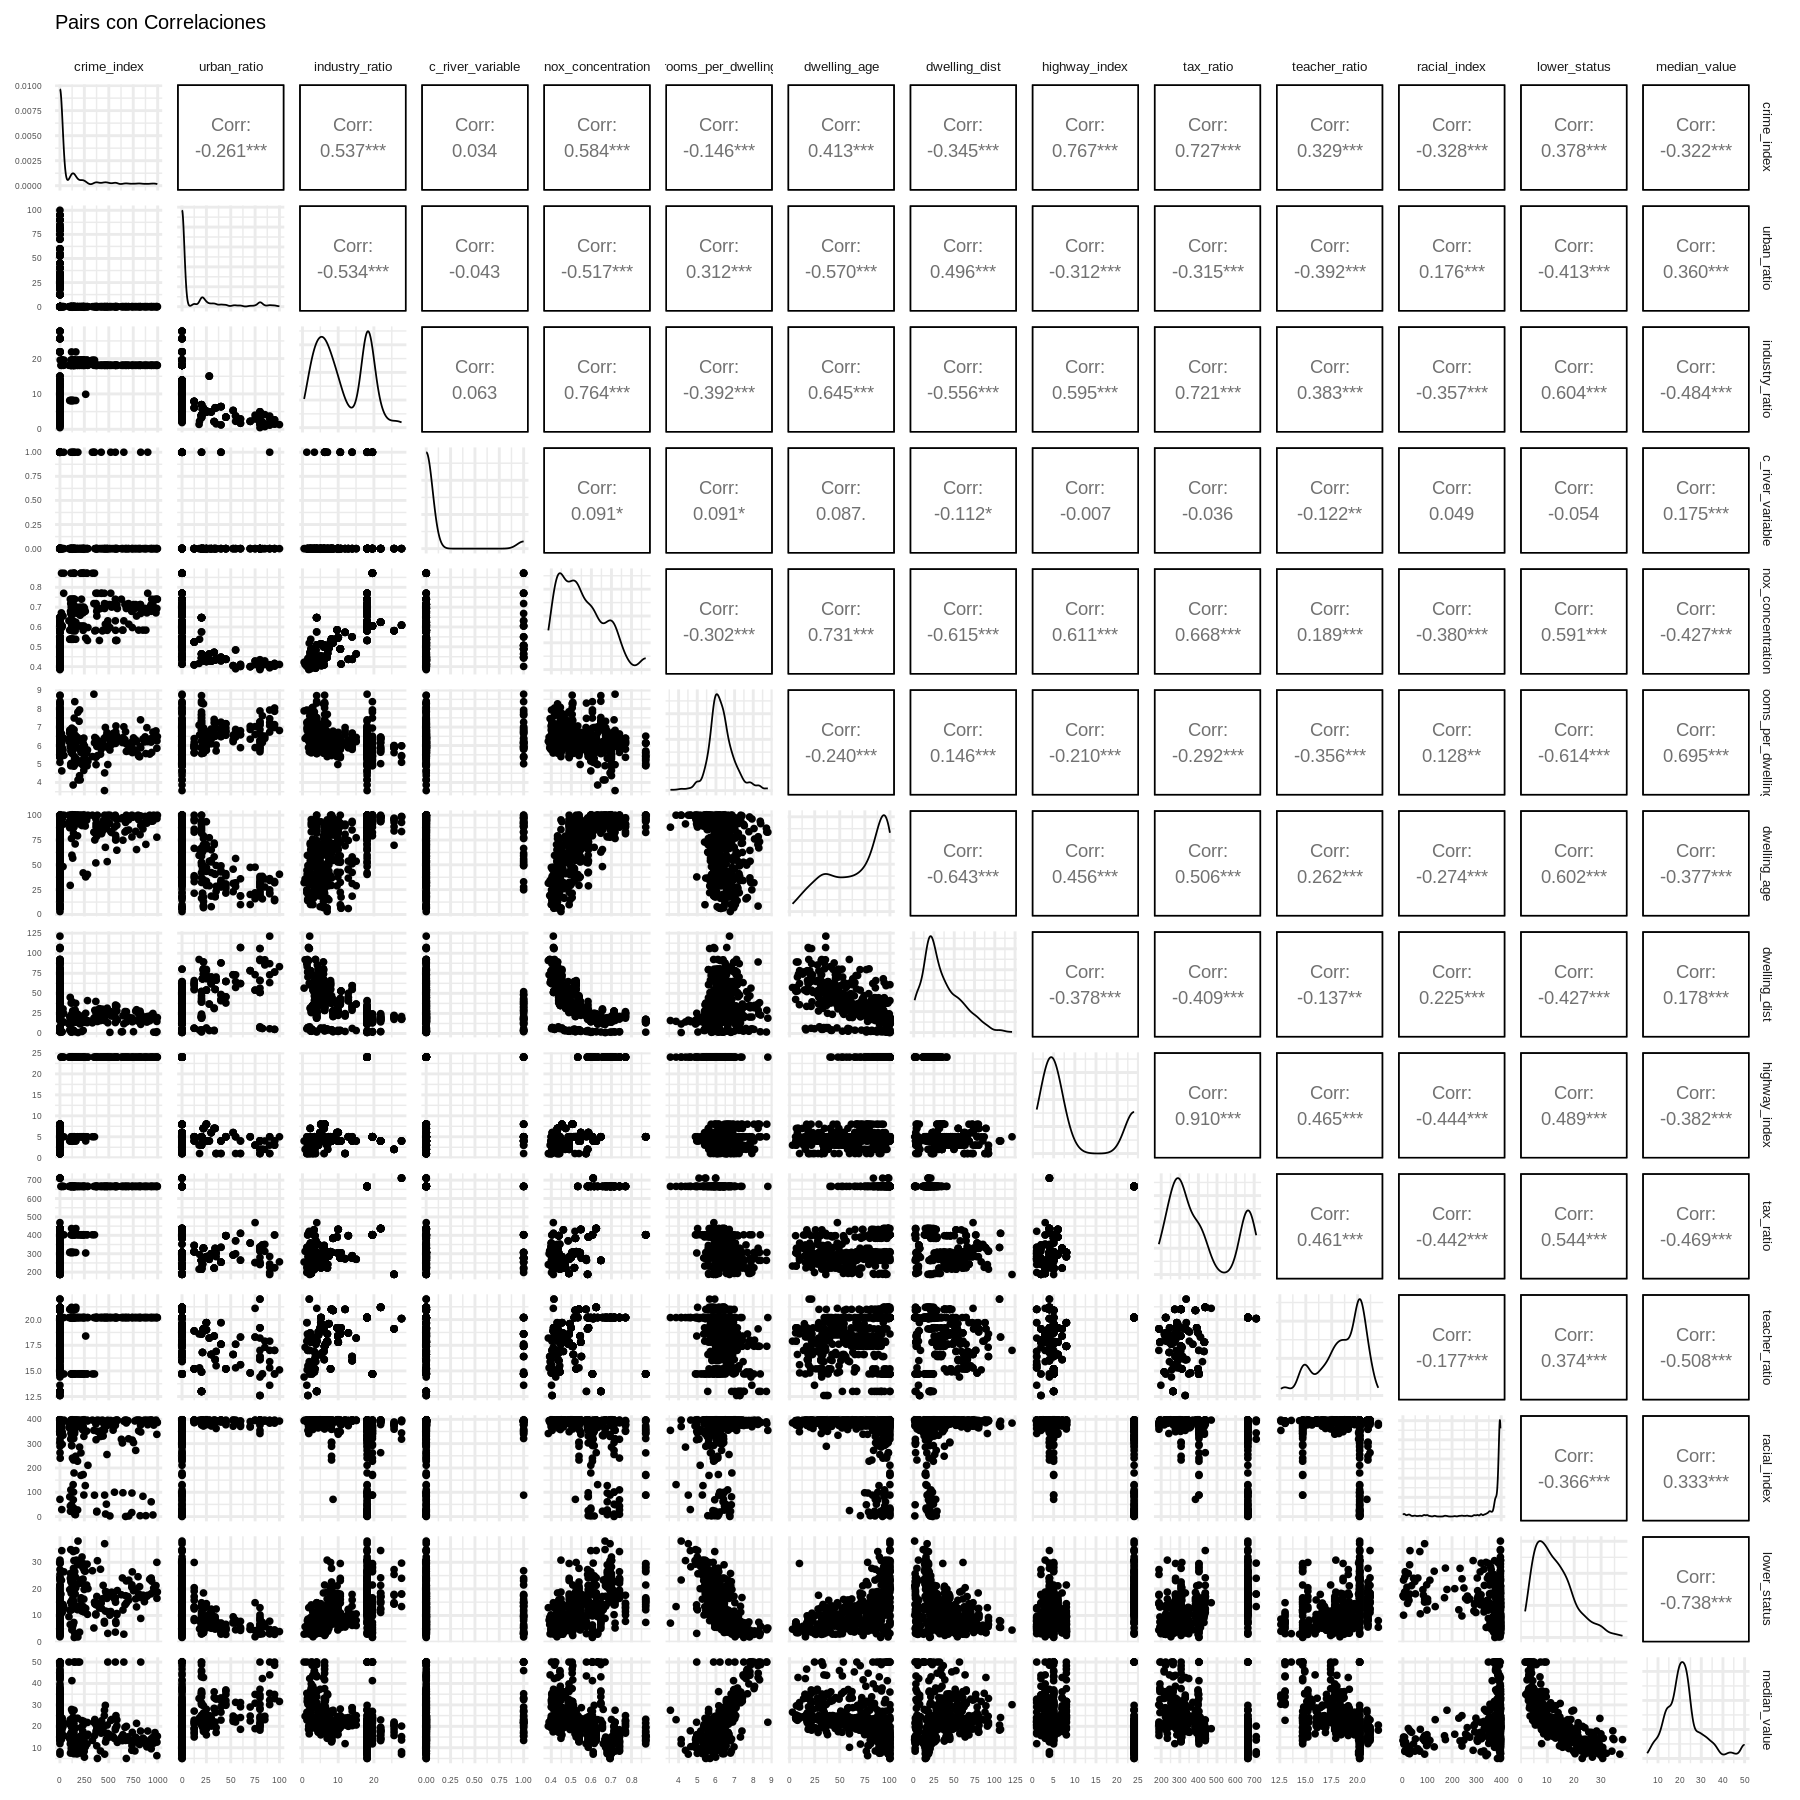

In [ ]:
options(
  repr.plot.width = 15,
  repr.plot.height = 15
)

ggpairs(boston,
        title = 'Pairs con Correlaciones',
        upper = list(continous = wrap ('cor', size = 5, color = 'darkblue'))) +
          theme(
          text = element_text (size = 10),
          axis.text = element_text (size = 5),
          axis.title = element_text(size = 25)
          )

In [ ]:
cor(boston$median_value, boston)

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
-0.3223877,0.3604453,-0.4837252,0.1752602,-0.4273208,0.6953599,-0.3769546,0.1780964,-0.3816262,-0.4685359,-0.5077867,0.3334608,-0.7376627,1


Para empezar el análisis de correlaciones, he decidido mirar todas las variables y su correlación con la variable objetivo, porque con esta información creo que podemos empezar a ver qué variables "pueden" ser más importantes para un potencial modelo y cuáles no. Las más importantes y que habrá que tener en cuenta son la 'lower_status' y la de 'rooms_per_dwelling'

Con el pair plot, también observamos las variables que están correlacionadas entre ellas. Lo vemos absolutamente todo. Será importante volver a graficar esto más adelante conforme vayamos reduciendo el número de variables, ya que es cuando empezaremos a poder ir más al detalle y entender mejor que casos son importantes.

El primer filtro que haremos para esto es seleccionar las variables con una correlación superior a 0,45. Con esto seleccionamos el top 5 variables más correlacionadas con la variable objetivo, y de esta forma, podemos analizar estas tres de una forma un pelín más detallada.

In [ ]:
#Correlaciones mayores de 0.45

boston_45 <- data.frame(boston$median_value
                            ,boston$lower_status
                            ,boston$rooms_per_dwelling
                            ,boston$teacher_ratio
                            ,boston$industry_ratio
                            ,boston$tax_ratio

)

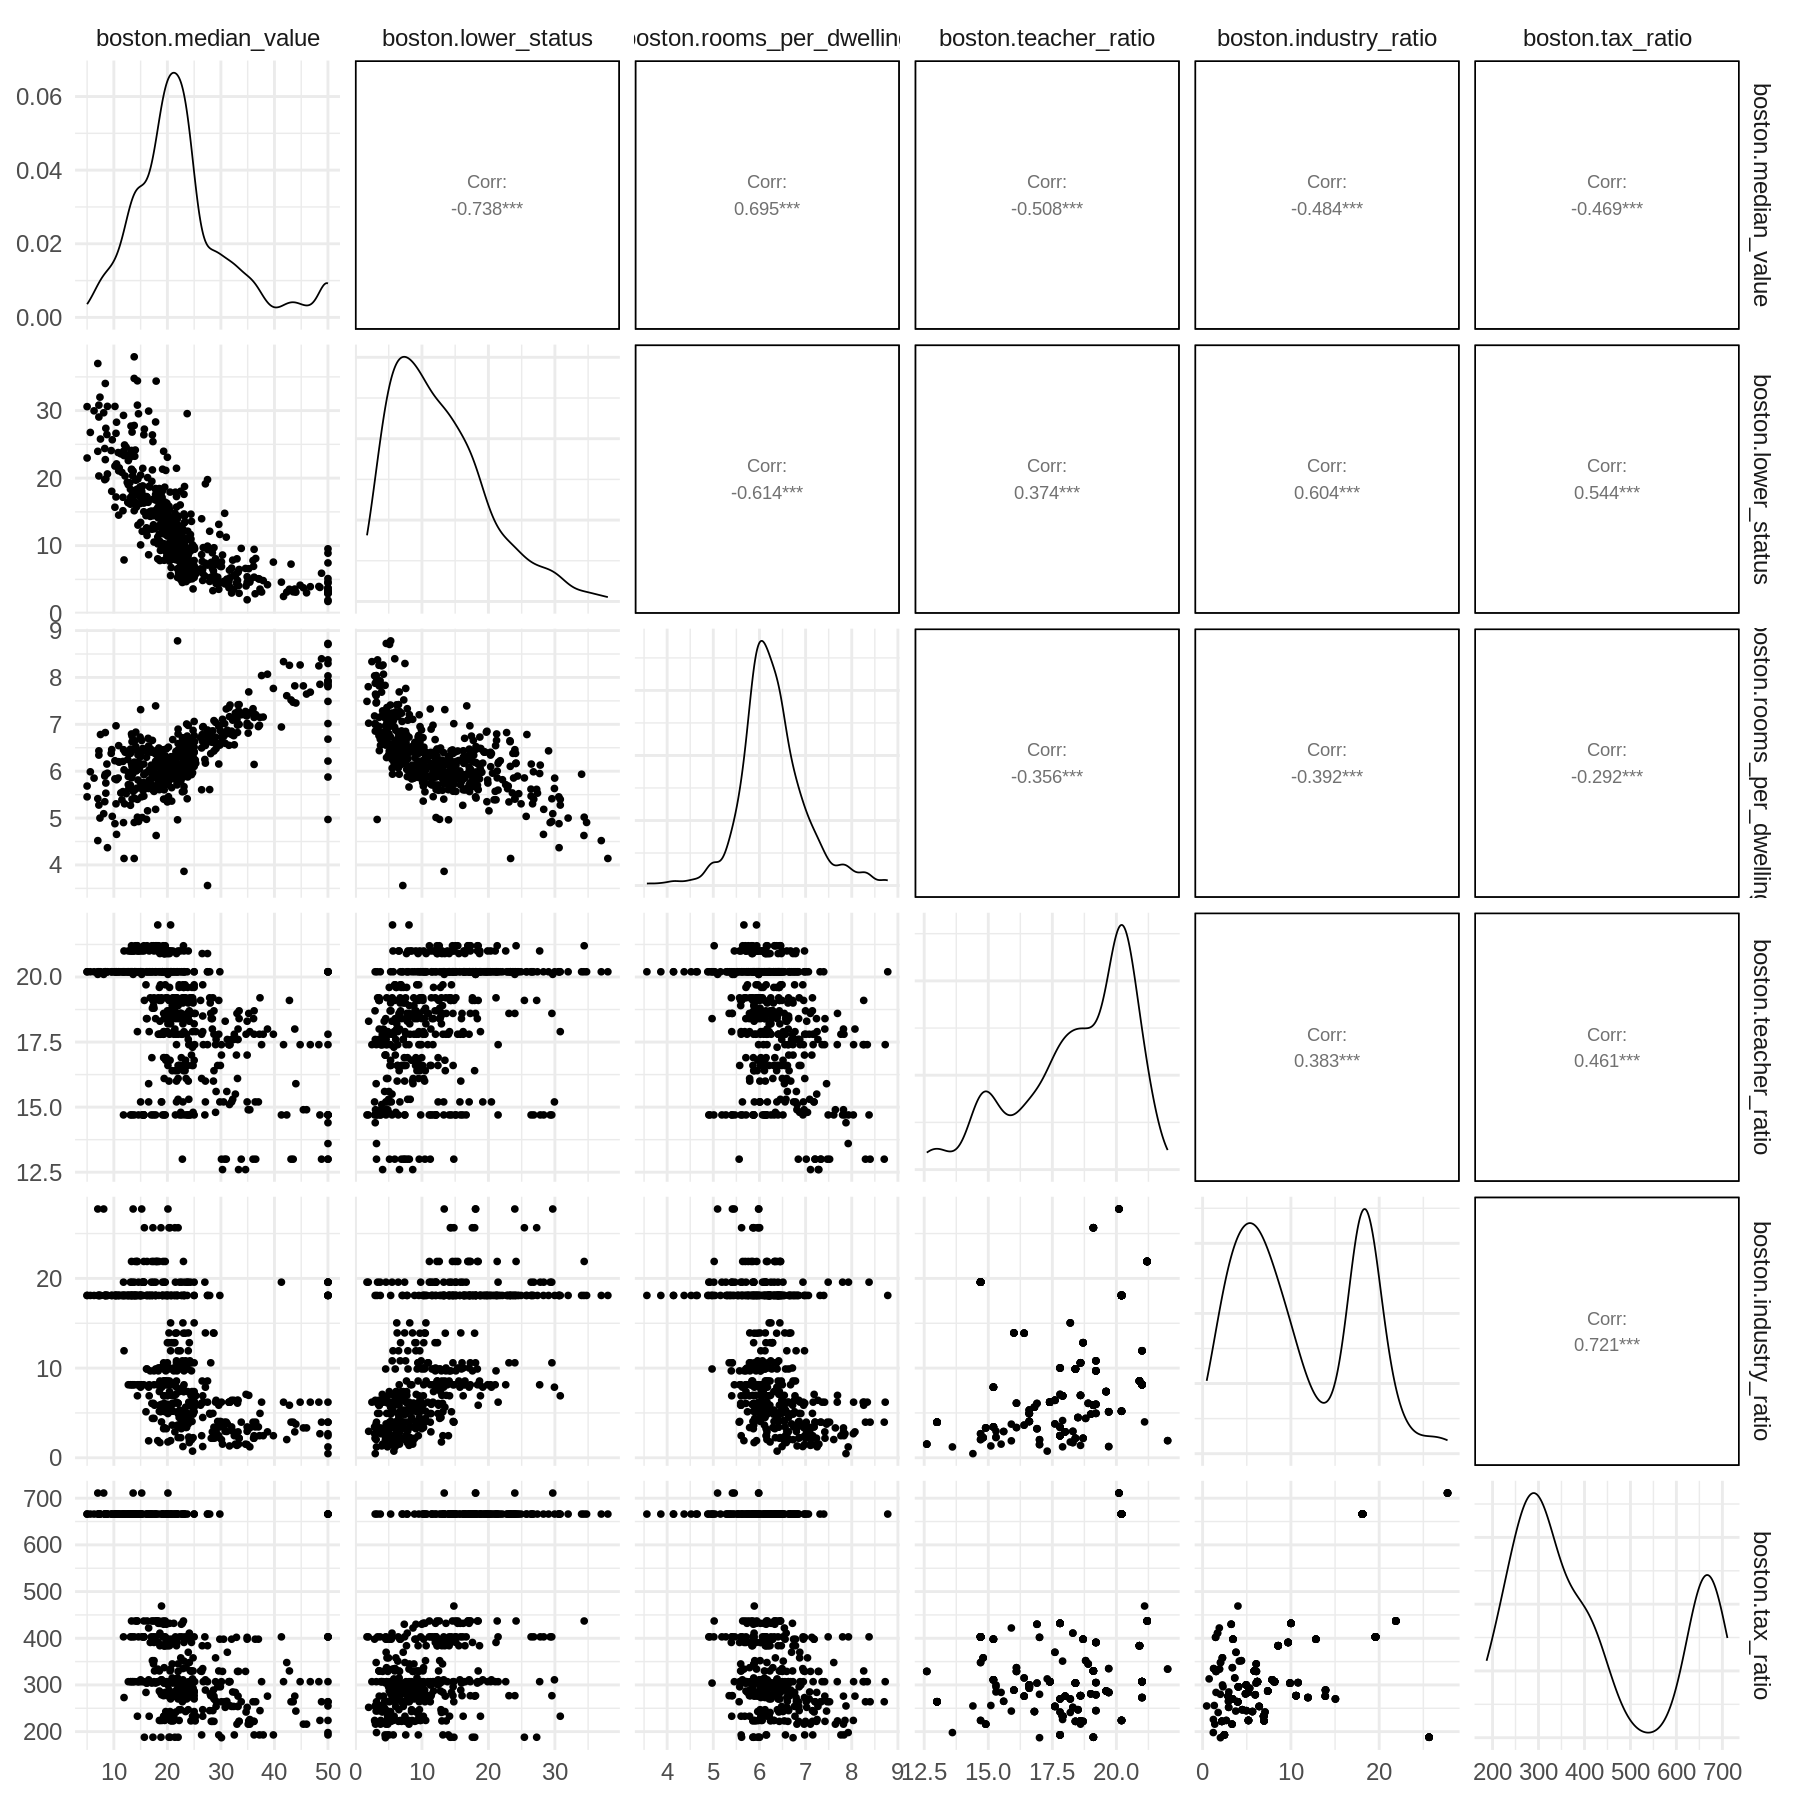

In [ ]:
ggpairs(boston_45)

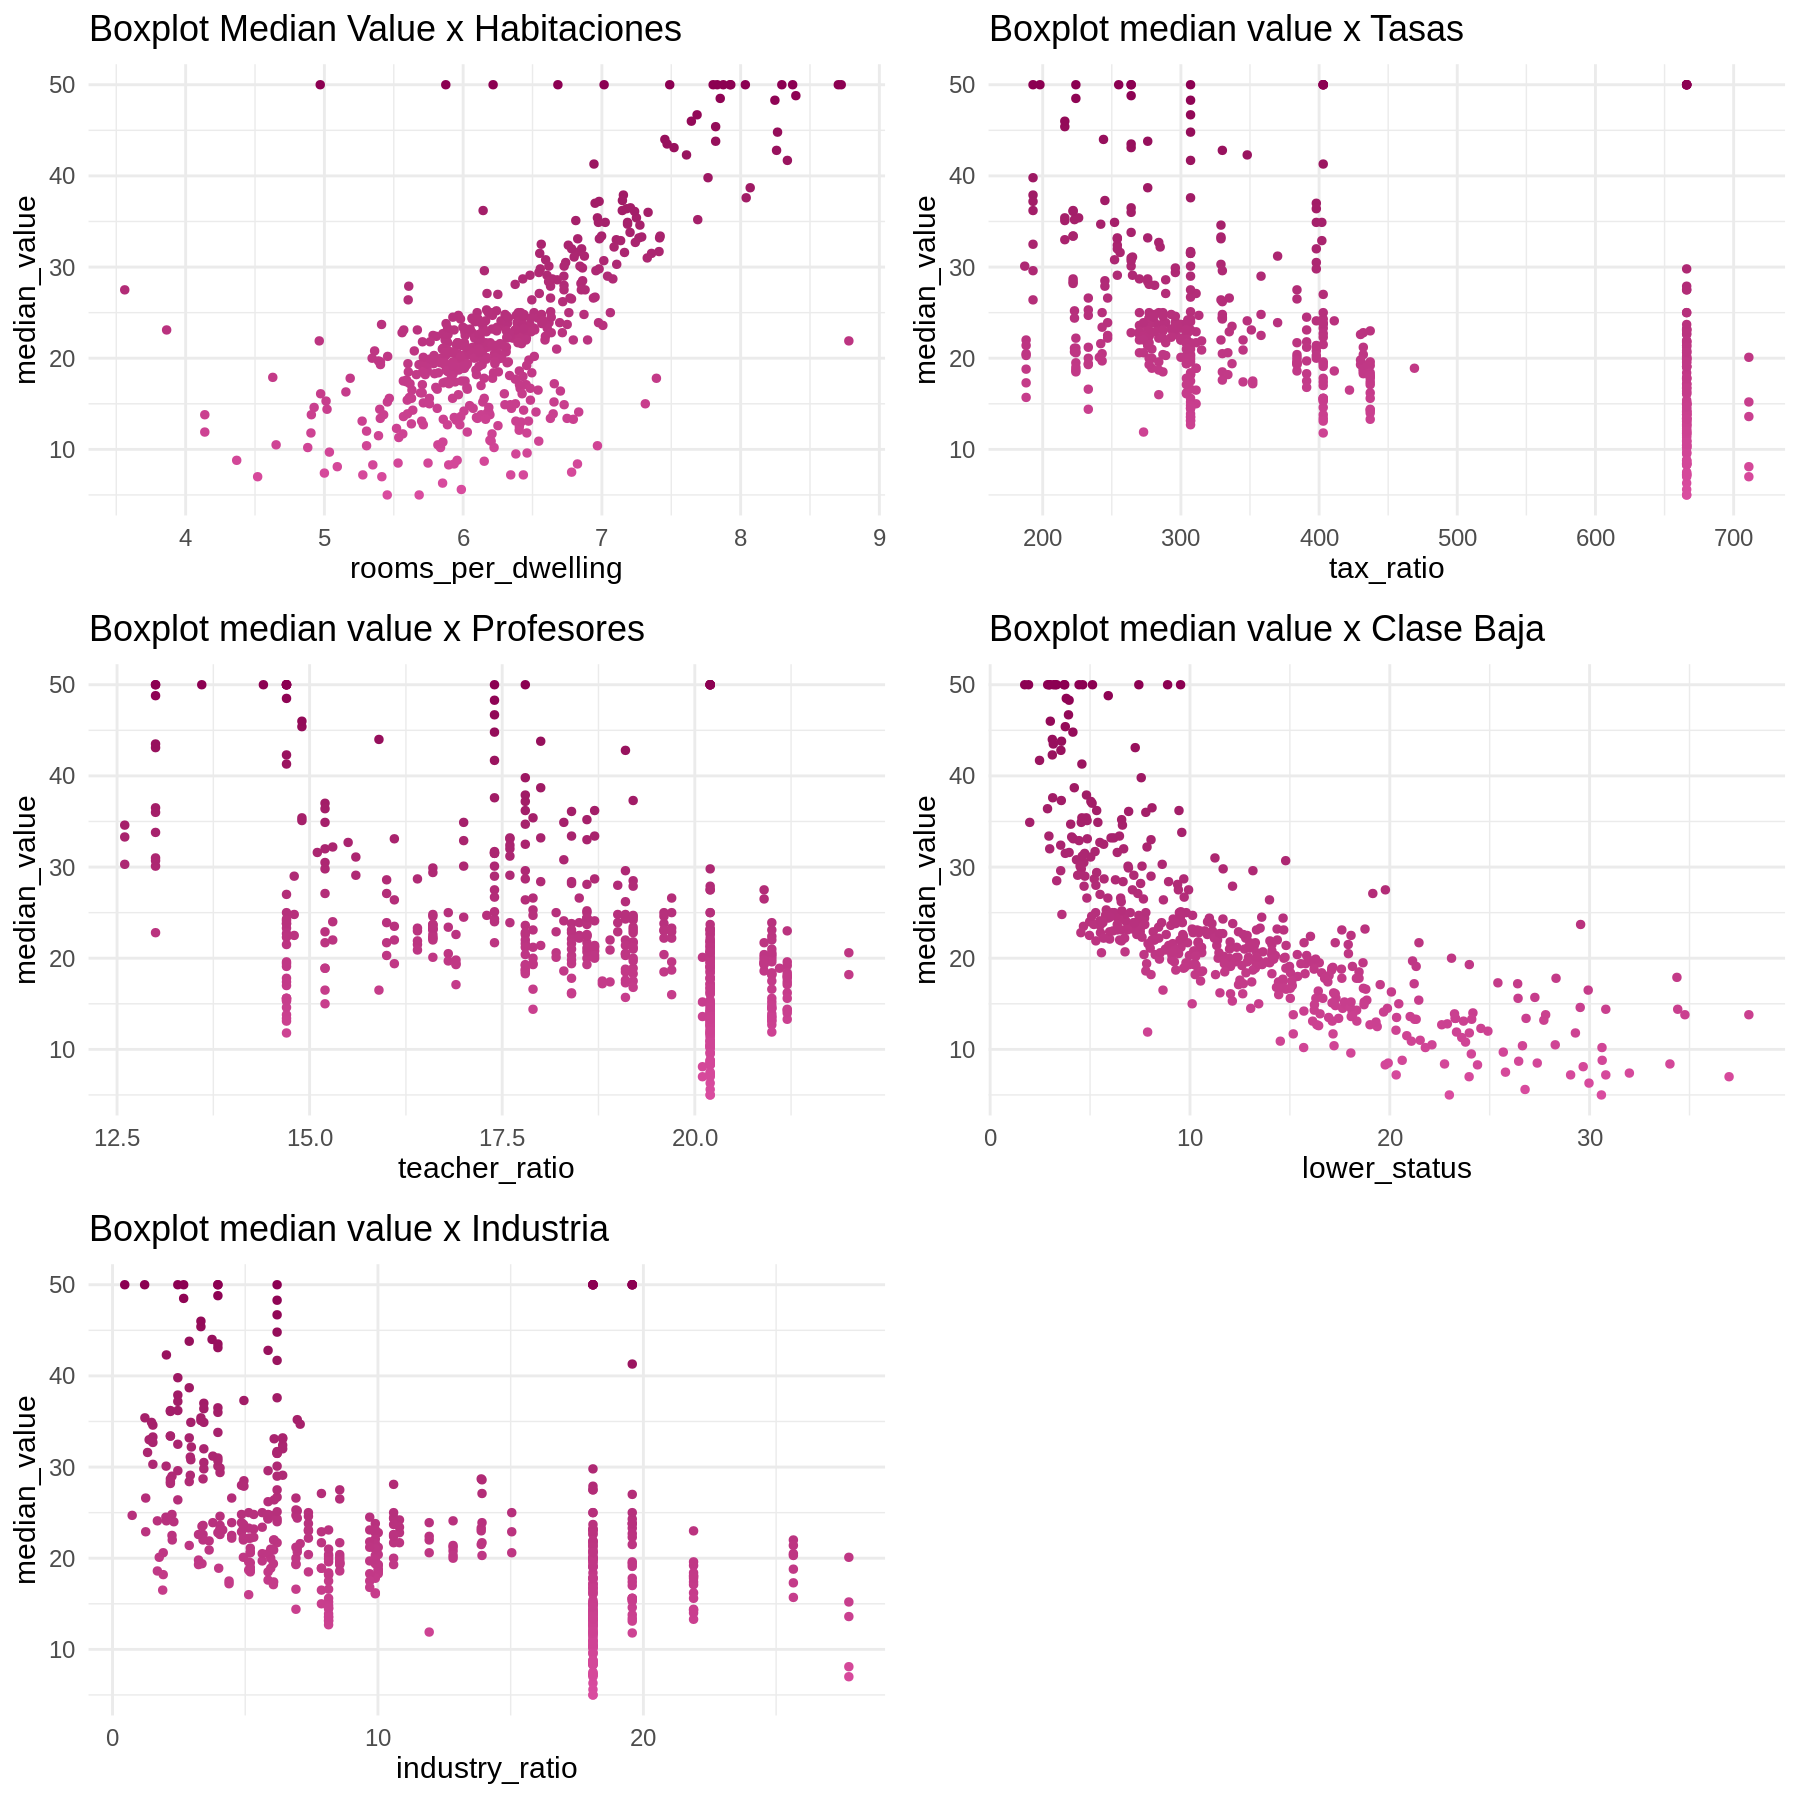

In [ ]:
a = ggplot(boston) +
  aes(x = rooms_per_dwelling,y = median_value,color = median_value) +
   geom_point(size = 2,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot Median Value x Habitaciones " )

b = ggplot(boston) +
  aes(x = tax_ratio,y = median_value,color = median_value) +
   geom_point(size = 2,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot median value x Tasas " )

c = ggplot(boston) +
  aes(x = teacher_ratio,y = median_value,color = median_value) +
   geom_point(size = 2,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot median value x Profesores " )

d = ggplot(boston) +
  aes(x = lower_status,y = median_value,color = median_value) +
   geom_point(size = 2,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot median value x Clase Baja " )

 e = ggplot(boston) +
  aes(x = industry_ratio,y = median_value,color = median_value) +
   geom_point(size = 2,show.legend = FALSE) +
   scale_color_gradient(low = "#d94c9f", high = "#8c0052") +
   labs(title = "Boxplot median value x Industria " )

grid.arrange(a,b,c,d,e)


Con este primer filtro, al graficar y, fijándonos sobre todo en los gráficos que involucren a la variable objetivo, podemos empezar a ver como sobre todo en lower status y median value se ve una correlación muy clara, y, en cambio, en las demás es mucho menos nítida y requiere mucha más imaginación.

- **3.2. Componentes**

In [ ]:
# PCA con todas las variables

correlation_all = cor(boston)
pca_all = princomp(boston, cor=TRUE)

summary(pca_all)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.5379733 1.2947589 1.1780506 0.93882896 0.92959813
Proportion of Variance 0.4600935 0.1197429 0.0991288 0.06295713 0.06172519
Cumulative Proportion  0.4600935 0.5798364 0.6789652 0.74192230 0.80364749
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.82762622 0.65235655 0.61812160 0.59155526 0.51385424
Proportion of Variance 0.04892608 0.03039779 0.02729102 0.02499554 0.01886044
Cumulative Proportion  0.85257358 0.88297137 0.91026239 0.93525793 0.95411838
                          Comp.11    Comp.12    Comp.13     Comp.14
Standard deviation     0.47936245 0.44107531 0.39777683 0.244500604
Proportion of Variance 0.01641345 0.01389625 0.01130189 0.004270039
Cumulative Proportion  0.97053183 0.98442807 0.99572996 1.000000000

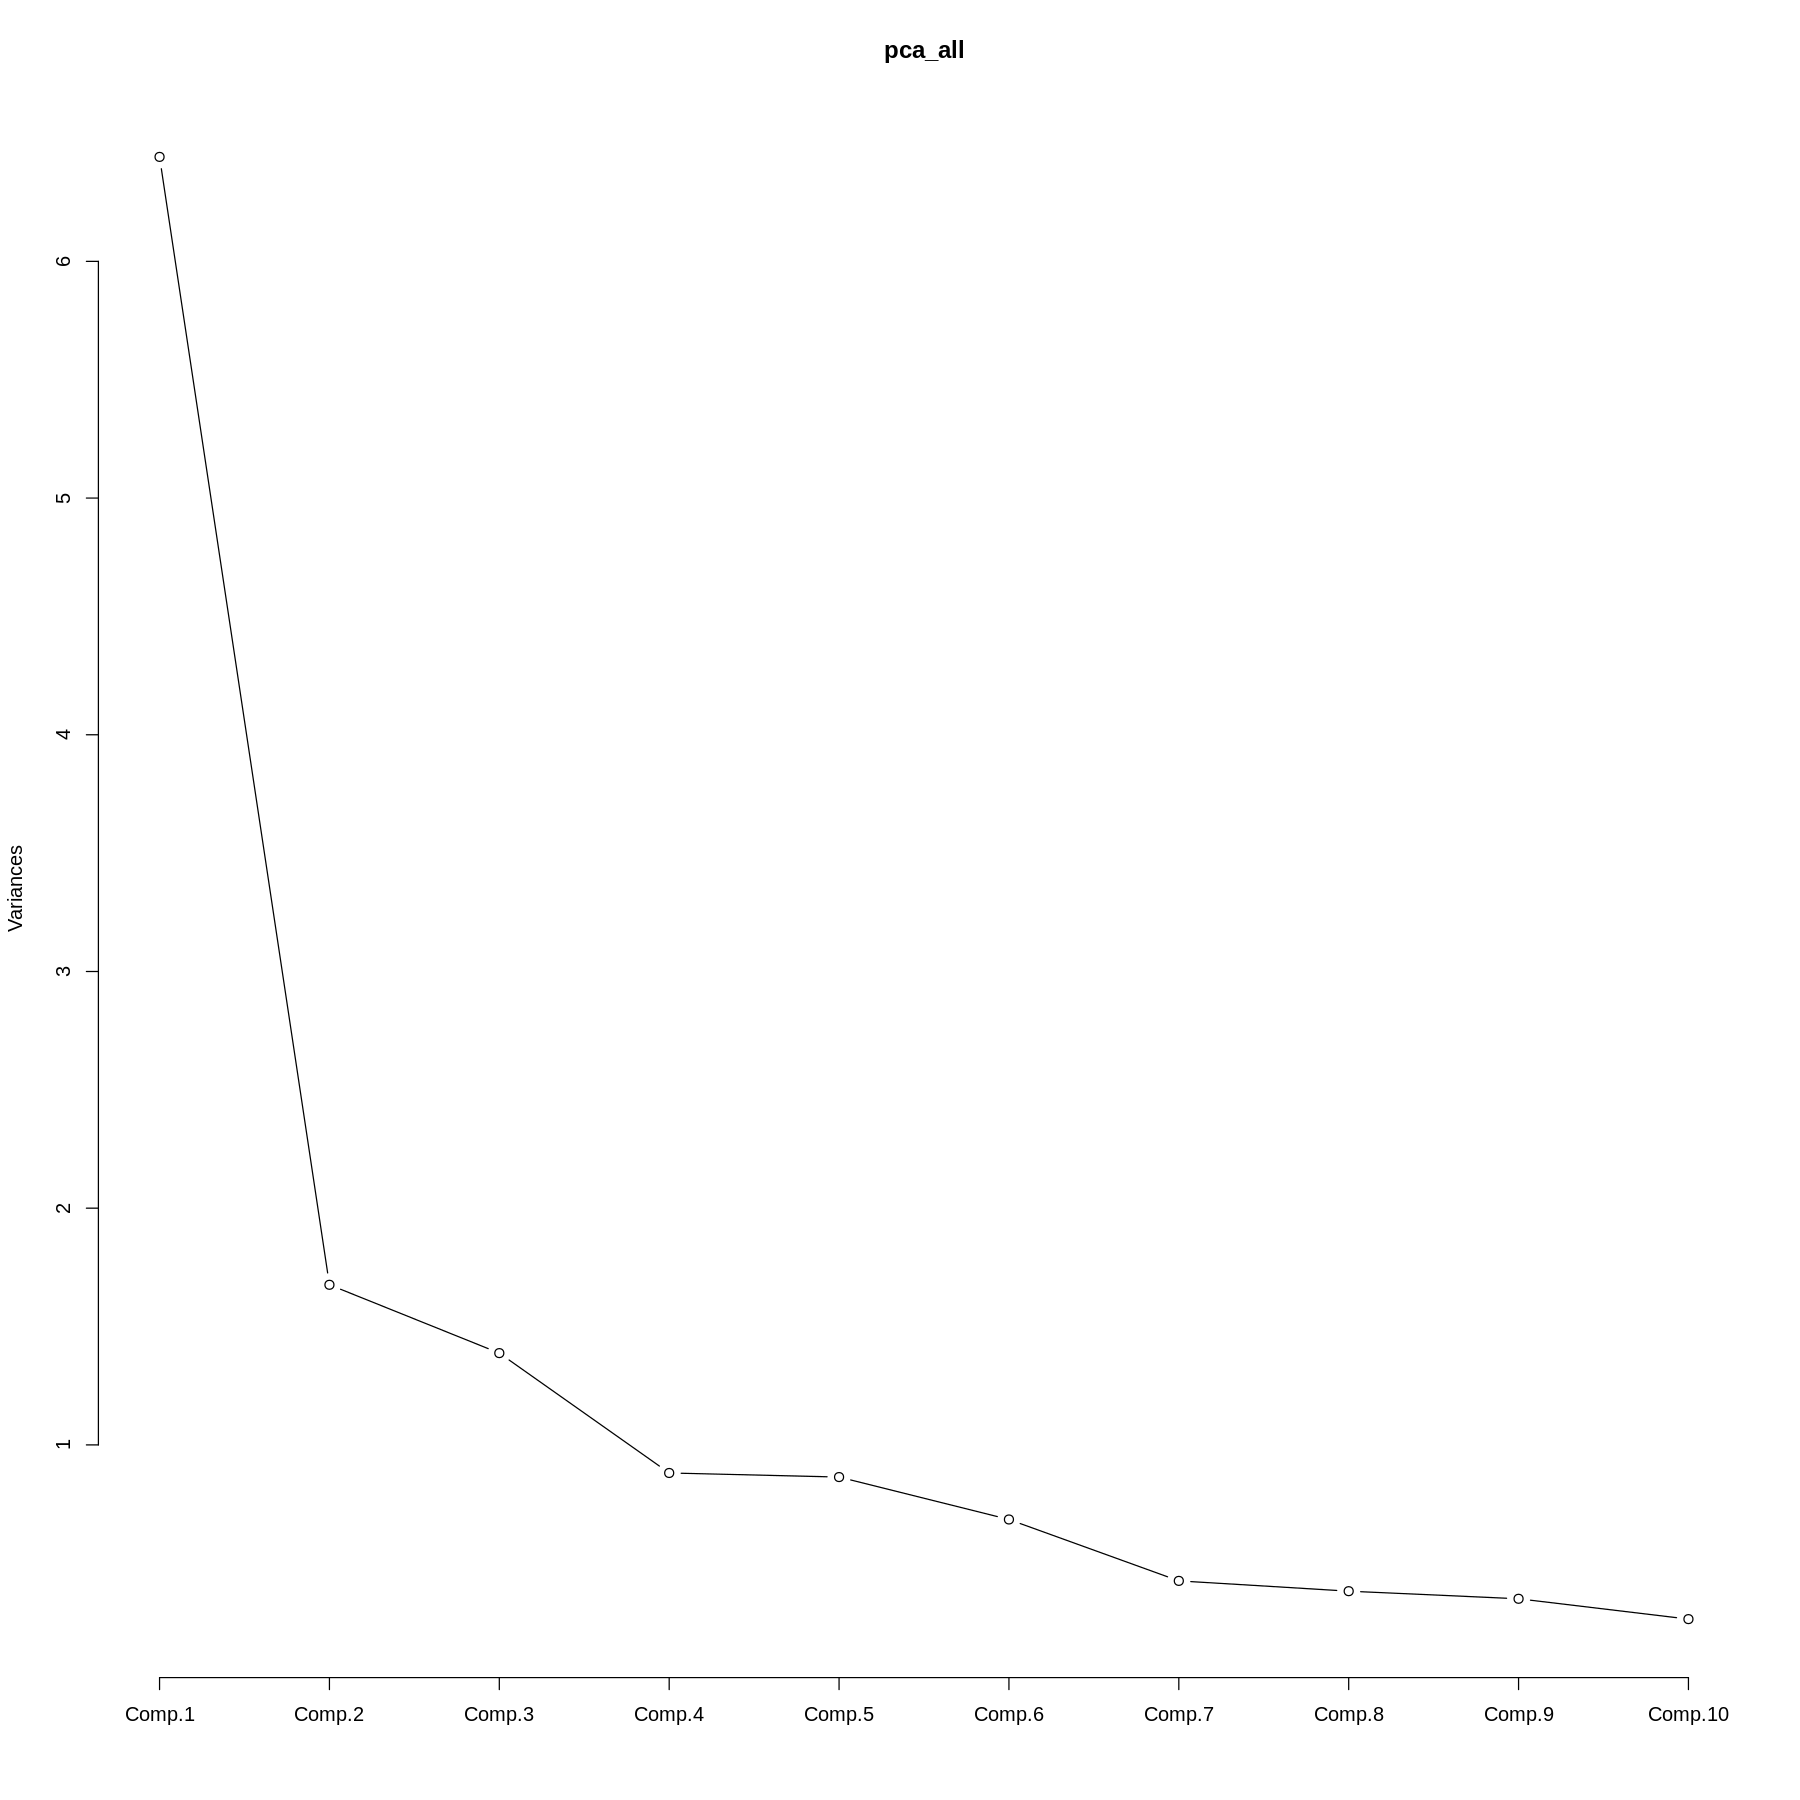

In [ ]:
plot(pca_all, type = 'lines')

El primer componente es muy explicativo y nos da mucha información sobre la varianza observada, pero a partir de aquí, todos los demás componentes tienen muy segregada la cantidad de información que nos aportan. Así que para poder explicar una gran cantidad de la varianza tendríamos que usar muchos componentes, cosa poco óptima.

¿Y si probamos de seleccionar alguna variable menos y repetir el PCA? En mi caso, he decidido seleccionar las variables que habíamos pre filtrado antes con una correlación mayor de 0.45

In [116]:
boston_pca2 = data.frame(boston$lower_status
                            ,boston$rooms_per_dwelling
                            ,boston$industry_ratio
                            ,boston$teacher_ratio
                            ,boston$tax_ratio)

In [117]:
#Hacemos PCA con las variables

correlation = cor(boston_pca2)
pca2 = princomp(boston_pca2, cor=TRUE)
summary(pca2)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.7089871 0.9044221 0.8322010 0.55757488 0.50787346
Proportion of Variance 0.5841274 0.1635959 0.1385117 0.06217795 0.05158709
Cumulative Proportion  0.5841274 0.7477233 0.8862350 0.94841291 1.00000000

Con los primeros tres componentes explicamos casi un 90% de la varianza, así que sería interesante estudiar estos tres y como estan formados.


In [118]:
loadings(pca2)


Loadings:
                          Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
boston.lower_status        0.488  0.293  0.257  0.776       
boston.rooms_per_dwelling -0.397 -0.742         0.494  0.216
boston.industry_ratio      0.487 -0.310  0.334 -0.376  0.643
boston.teacher_ratio       0.379 -0.133 -0.896         0.166
boston.tax_ratio           0.472 -0.499  0.136        -0.710

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

Y, al analizar al detalle los componentes que nos ha creado el PCA, podemos ver que las variables lower_status, tax_ratio y industry_ratio son las más importantes en el primer componente. Para el segundo lo es especialmente la variable rooms_per_dwelling y para el tercero el teaching_ratio.

**Modificar escala del grafico 1**

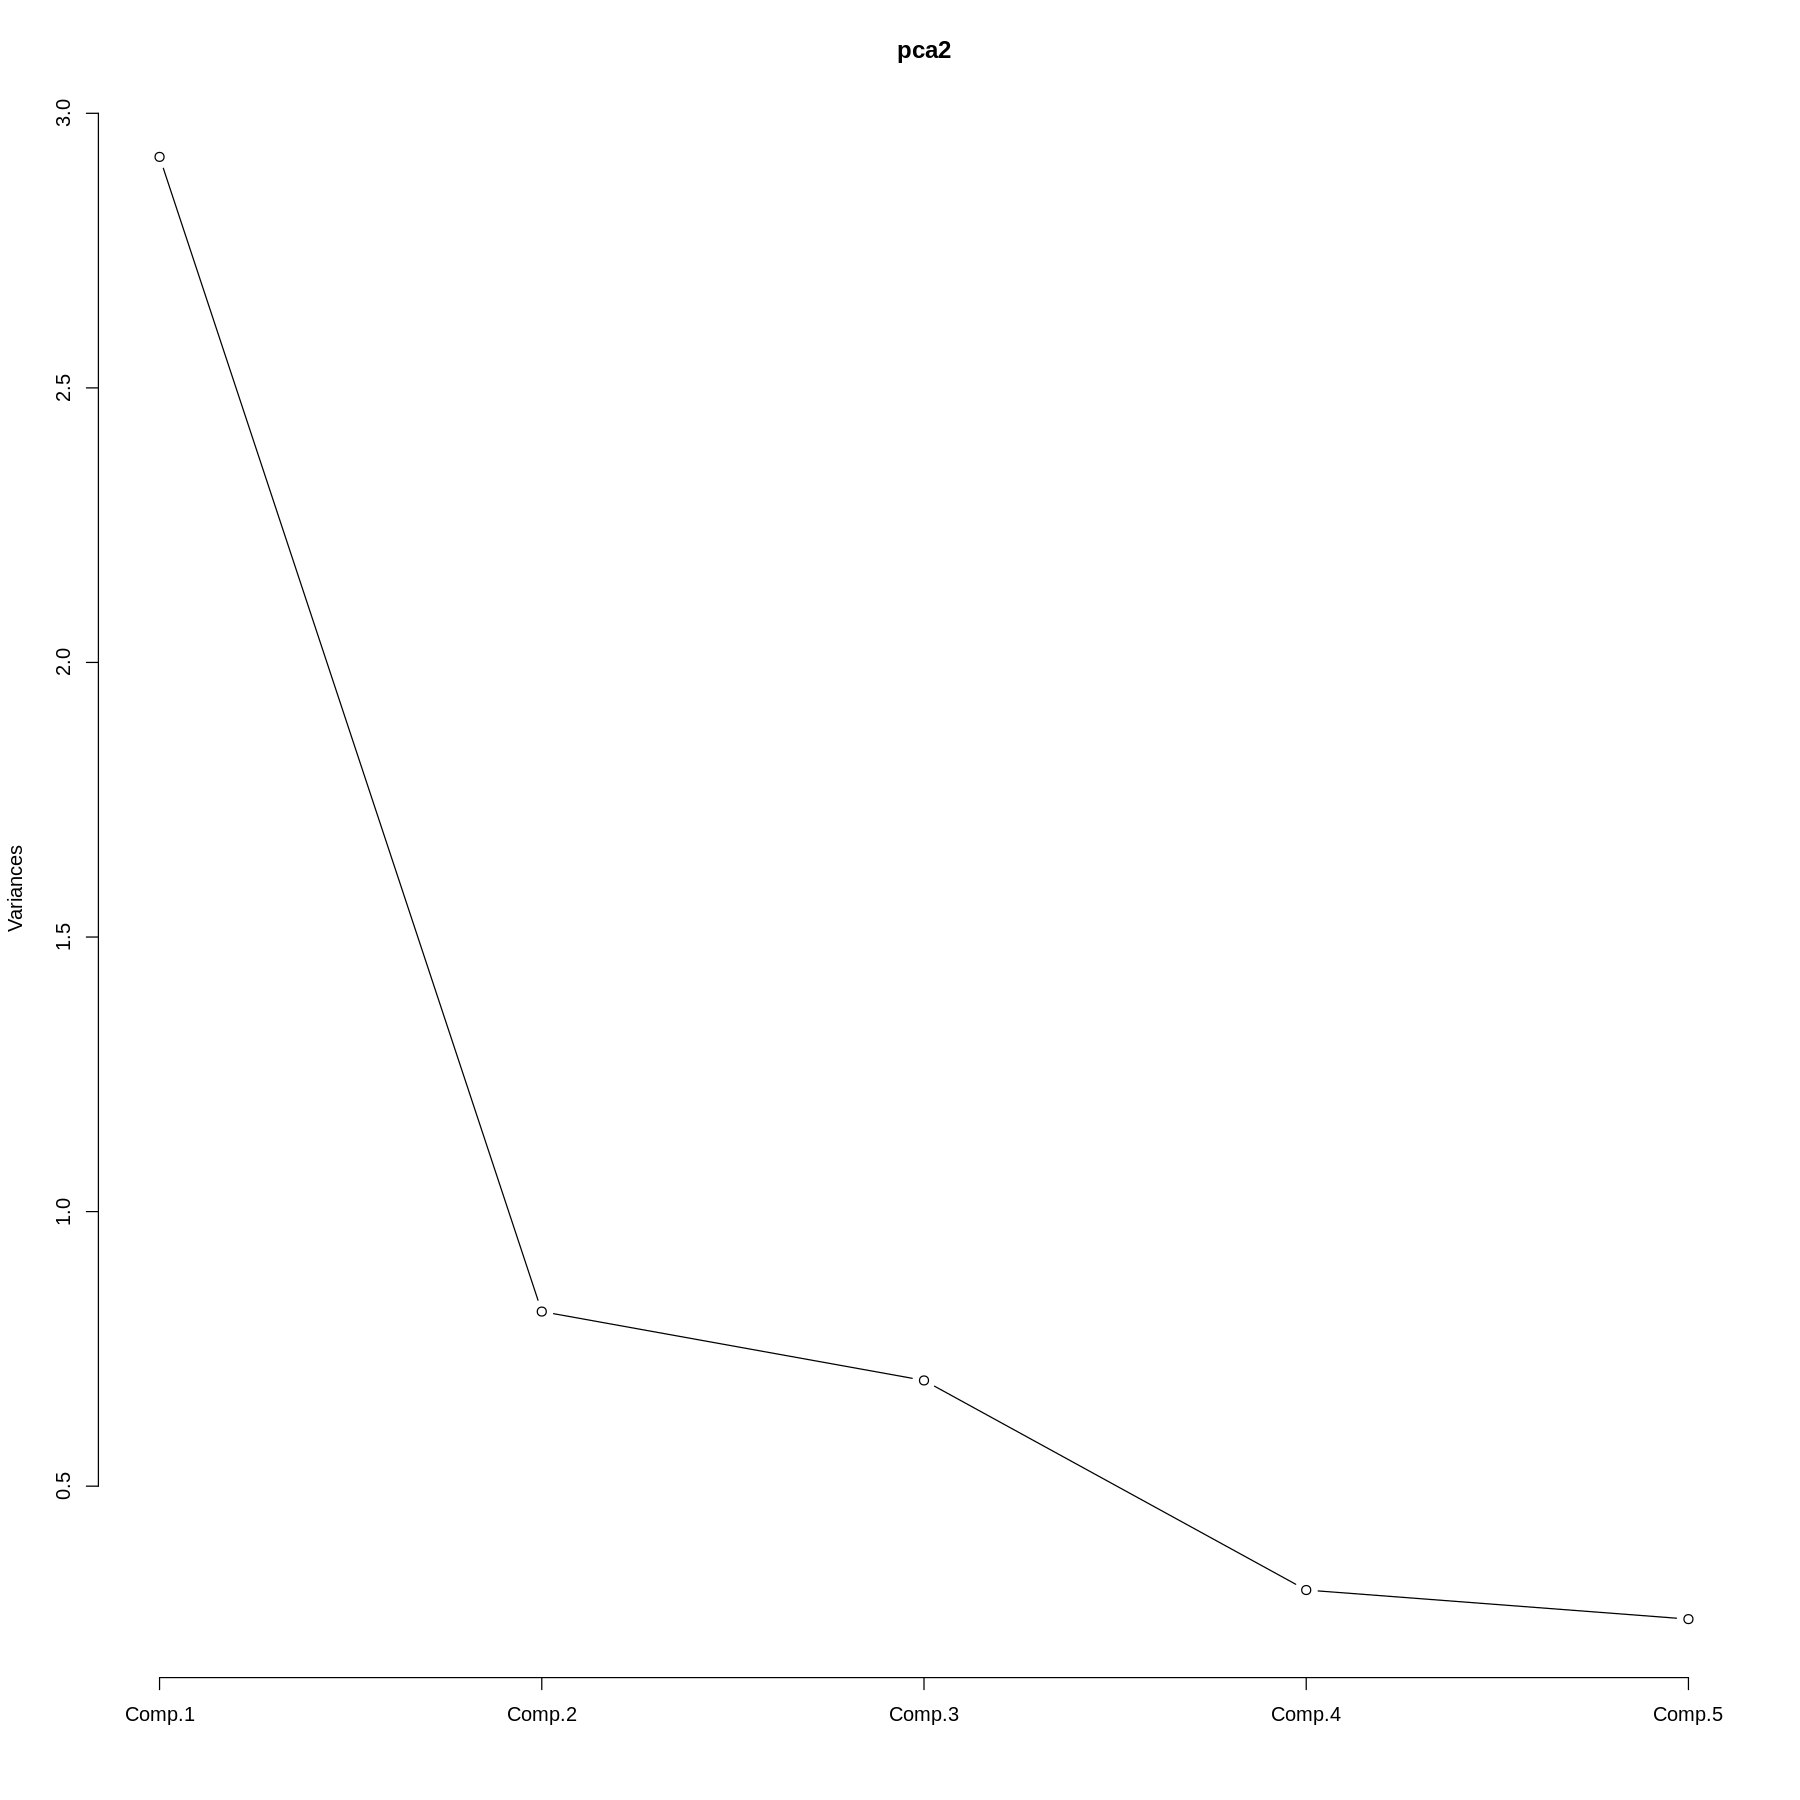

In [119]:
a = plot(pca2, type ='lines', xlim =)

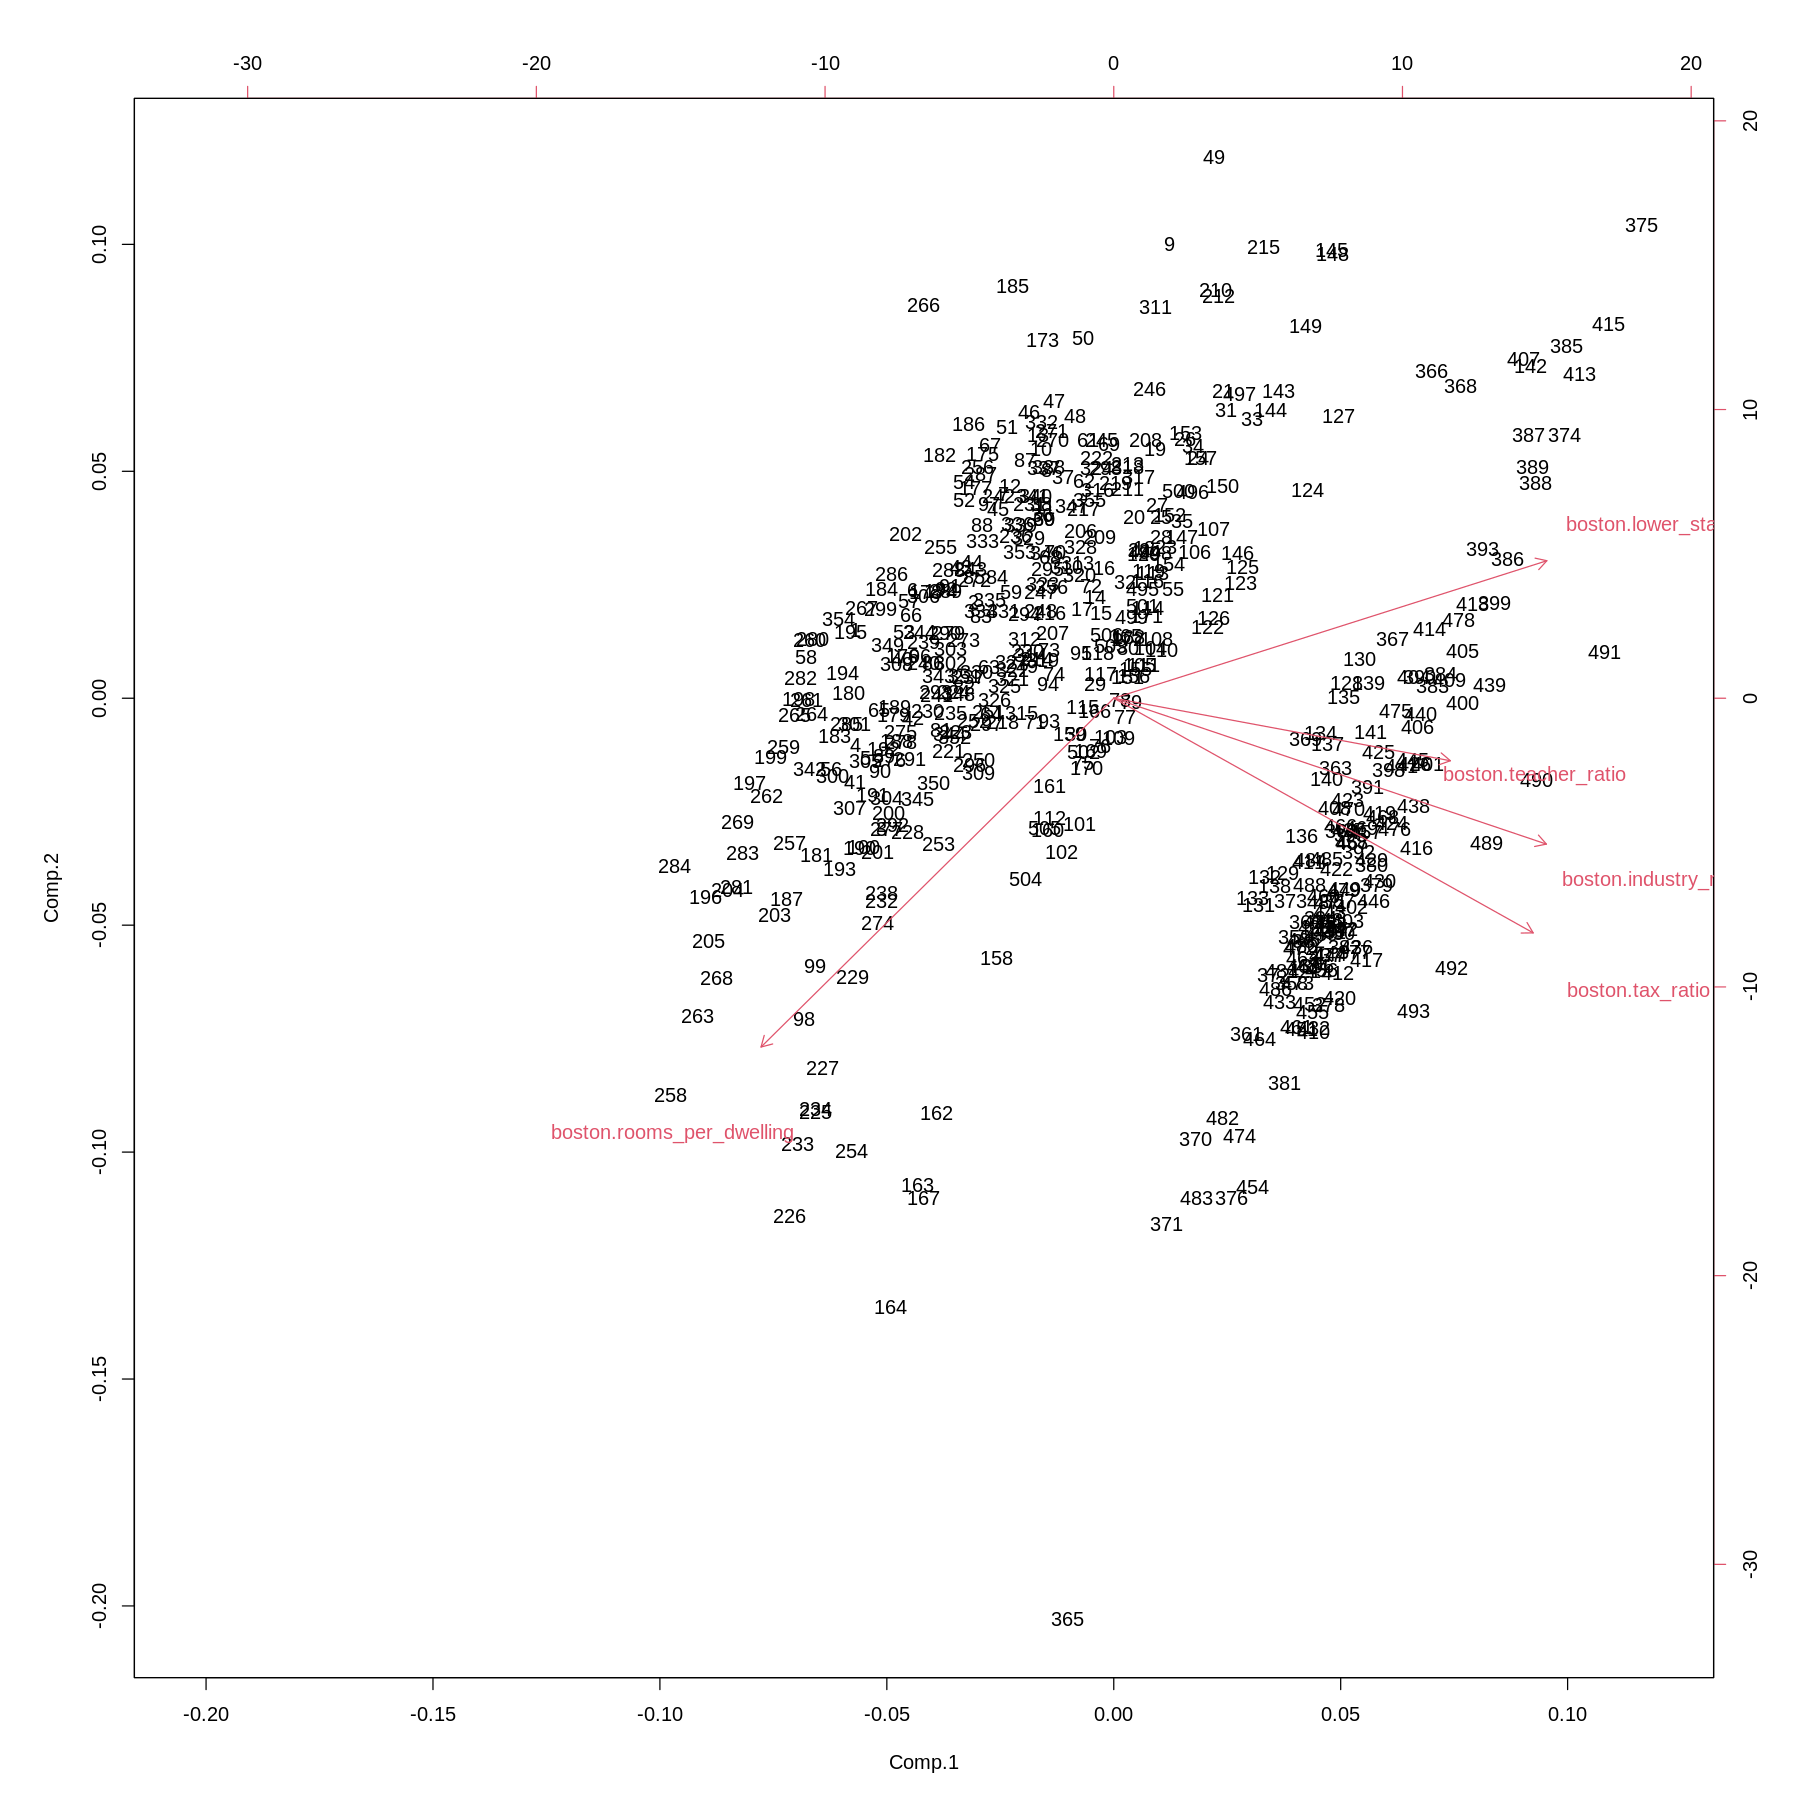

In [120]:
b = biplot(pca2)


Al graficar, especialmente en el primer gráfico, observamos una gran diferencia respecto al que hemos hecho después del PCA de todas las variables. Si nos fijamos, la caída entre el primer componente y el segundo es menos pronunciada y desde más abajo (al fijarnos en el eje de las y vemos que uno cae desde 6 y el otro desde 3). Esto nos está indicando la diferencia entre la importancia entre el primero y el segundo es menor.

También se observa que en el segundo PCA la importancia de los componentes va decreciendo paulatinamente hasta que el 4 y el 5 tienen muy poca, en cambio, en el otro vemos esta tendencia más moderada y la necesidad de incluir hasta 7 componentes.

# 4. ANOVA

Para empezar el test de ANOVA, vamos a necesitar crear una variable categórica de la variable objetivo que nos ayude a buscar las diferencias entre las distribuciones de datos. He pensado que para hacerlo, primero merece la pena estudiar la distribución de la variable otra vez y ver que tendría más sentido.

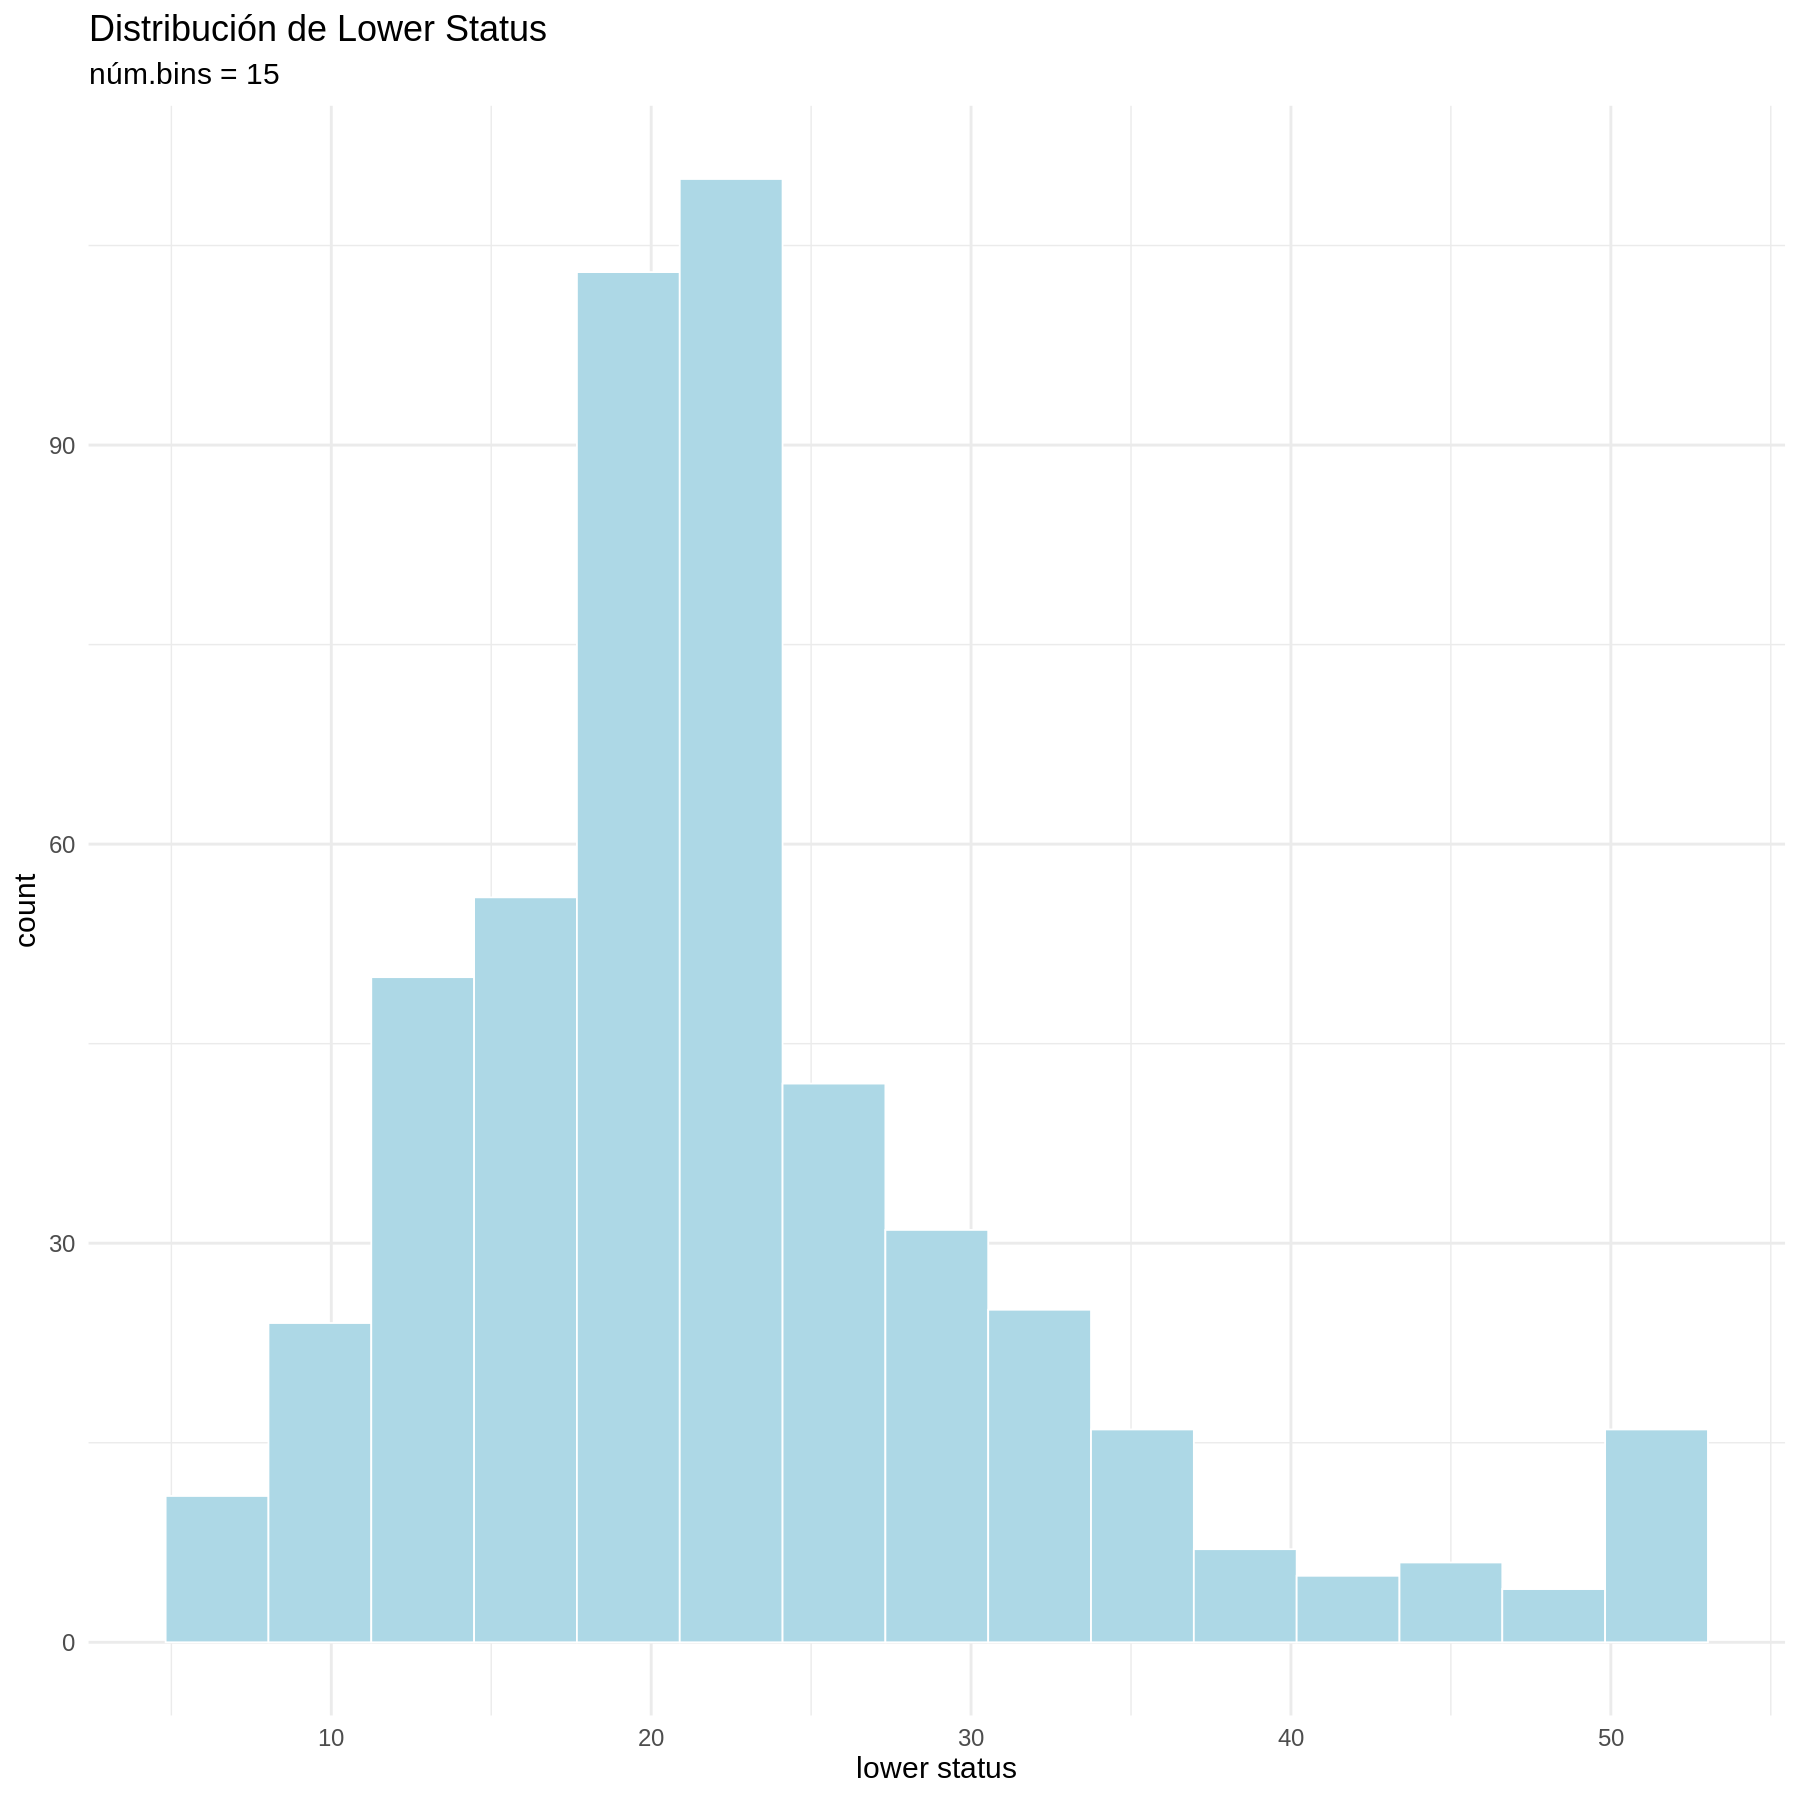

In [ ]:
# Crearemos una variable categórica para el test ANOVA

ggplot(boston) +
  aes(x = median_value) +
  geom_histogram(bins = 15 ,fill = "lightblue",color = "white") +
  labs(title="Distribución de Lower Status"  ,subtitle = "núm.bins = 15",x = "lower status")

In [ ]:
summary(boston$median_value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

Aunque está un poco sesgada, y como ya hemos visto antes, hay outliers por la parte superior, consideraremos que hacer una partición por la mediana (parta tener unas distribuciones balanceadas) es una buena manera de obtener dos grupos de datos que puedan darnos información representativa.

In [ ]:
# Dos grupos Low (por debajo de la mediana) y High (por encima de la mediana)

boston <- boston %>%
  mutate(median_category = ifelse(median_value > median(median_value), "High", "Low"))

head(boston)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value,median_category
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0,High
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6,High
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7,High
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4,High
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2,High
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7,High


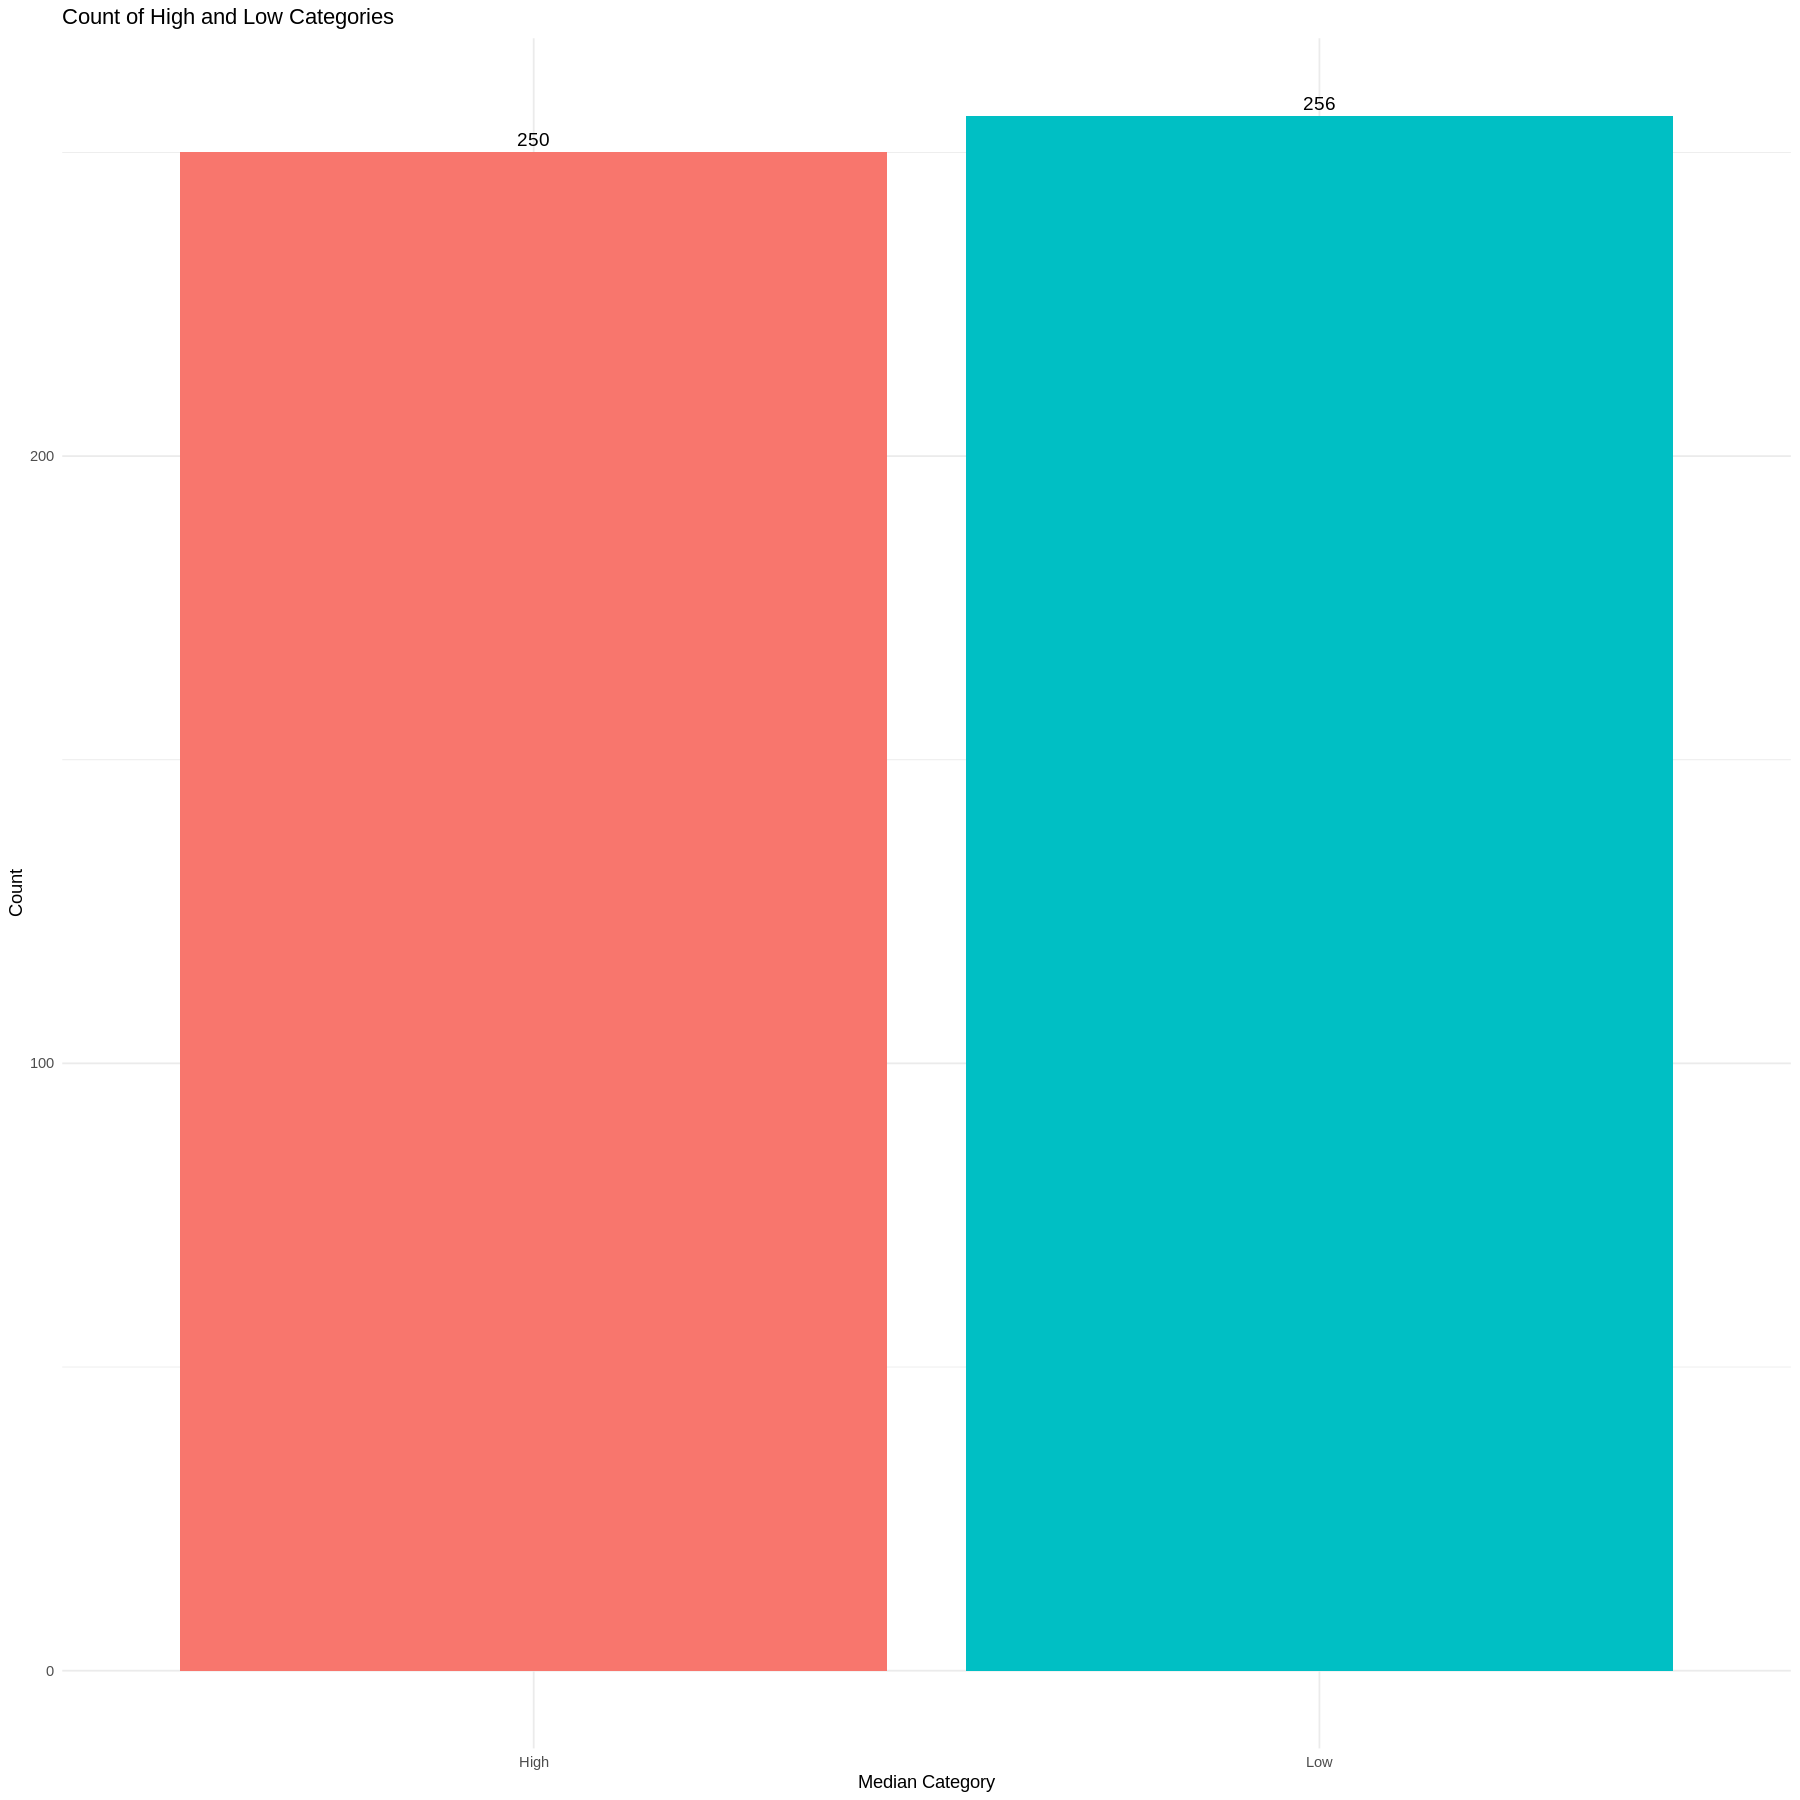

In [ ]:
ggplot(boston, aes(x = median_category, fill = median_category)) +
  geom_bar(stat = "count", show.legend = FALSE) +
  geom_text(stat = "count", aes(label = stat(count)), vjust = -0.5, size = 4) +
  labs(title = "Count of High and Low Categories",
       x = "Median Category",
       y = "Count") +
  theme_minimal() +
  theme(legend.text = element_text(size = 12))


Antes de empezar con los test, he creído que merecía la pena graficar el pairplot similar al anterior, pero en este caso pintándolo con la variable categórica creada. Es interesante observar la separabilidad de los datos en función del valor mediano de los apartamentos. Y es un ejercicio que nos da bastante información sobre el impacto que tienen las variables.

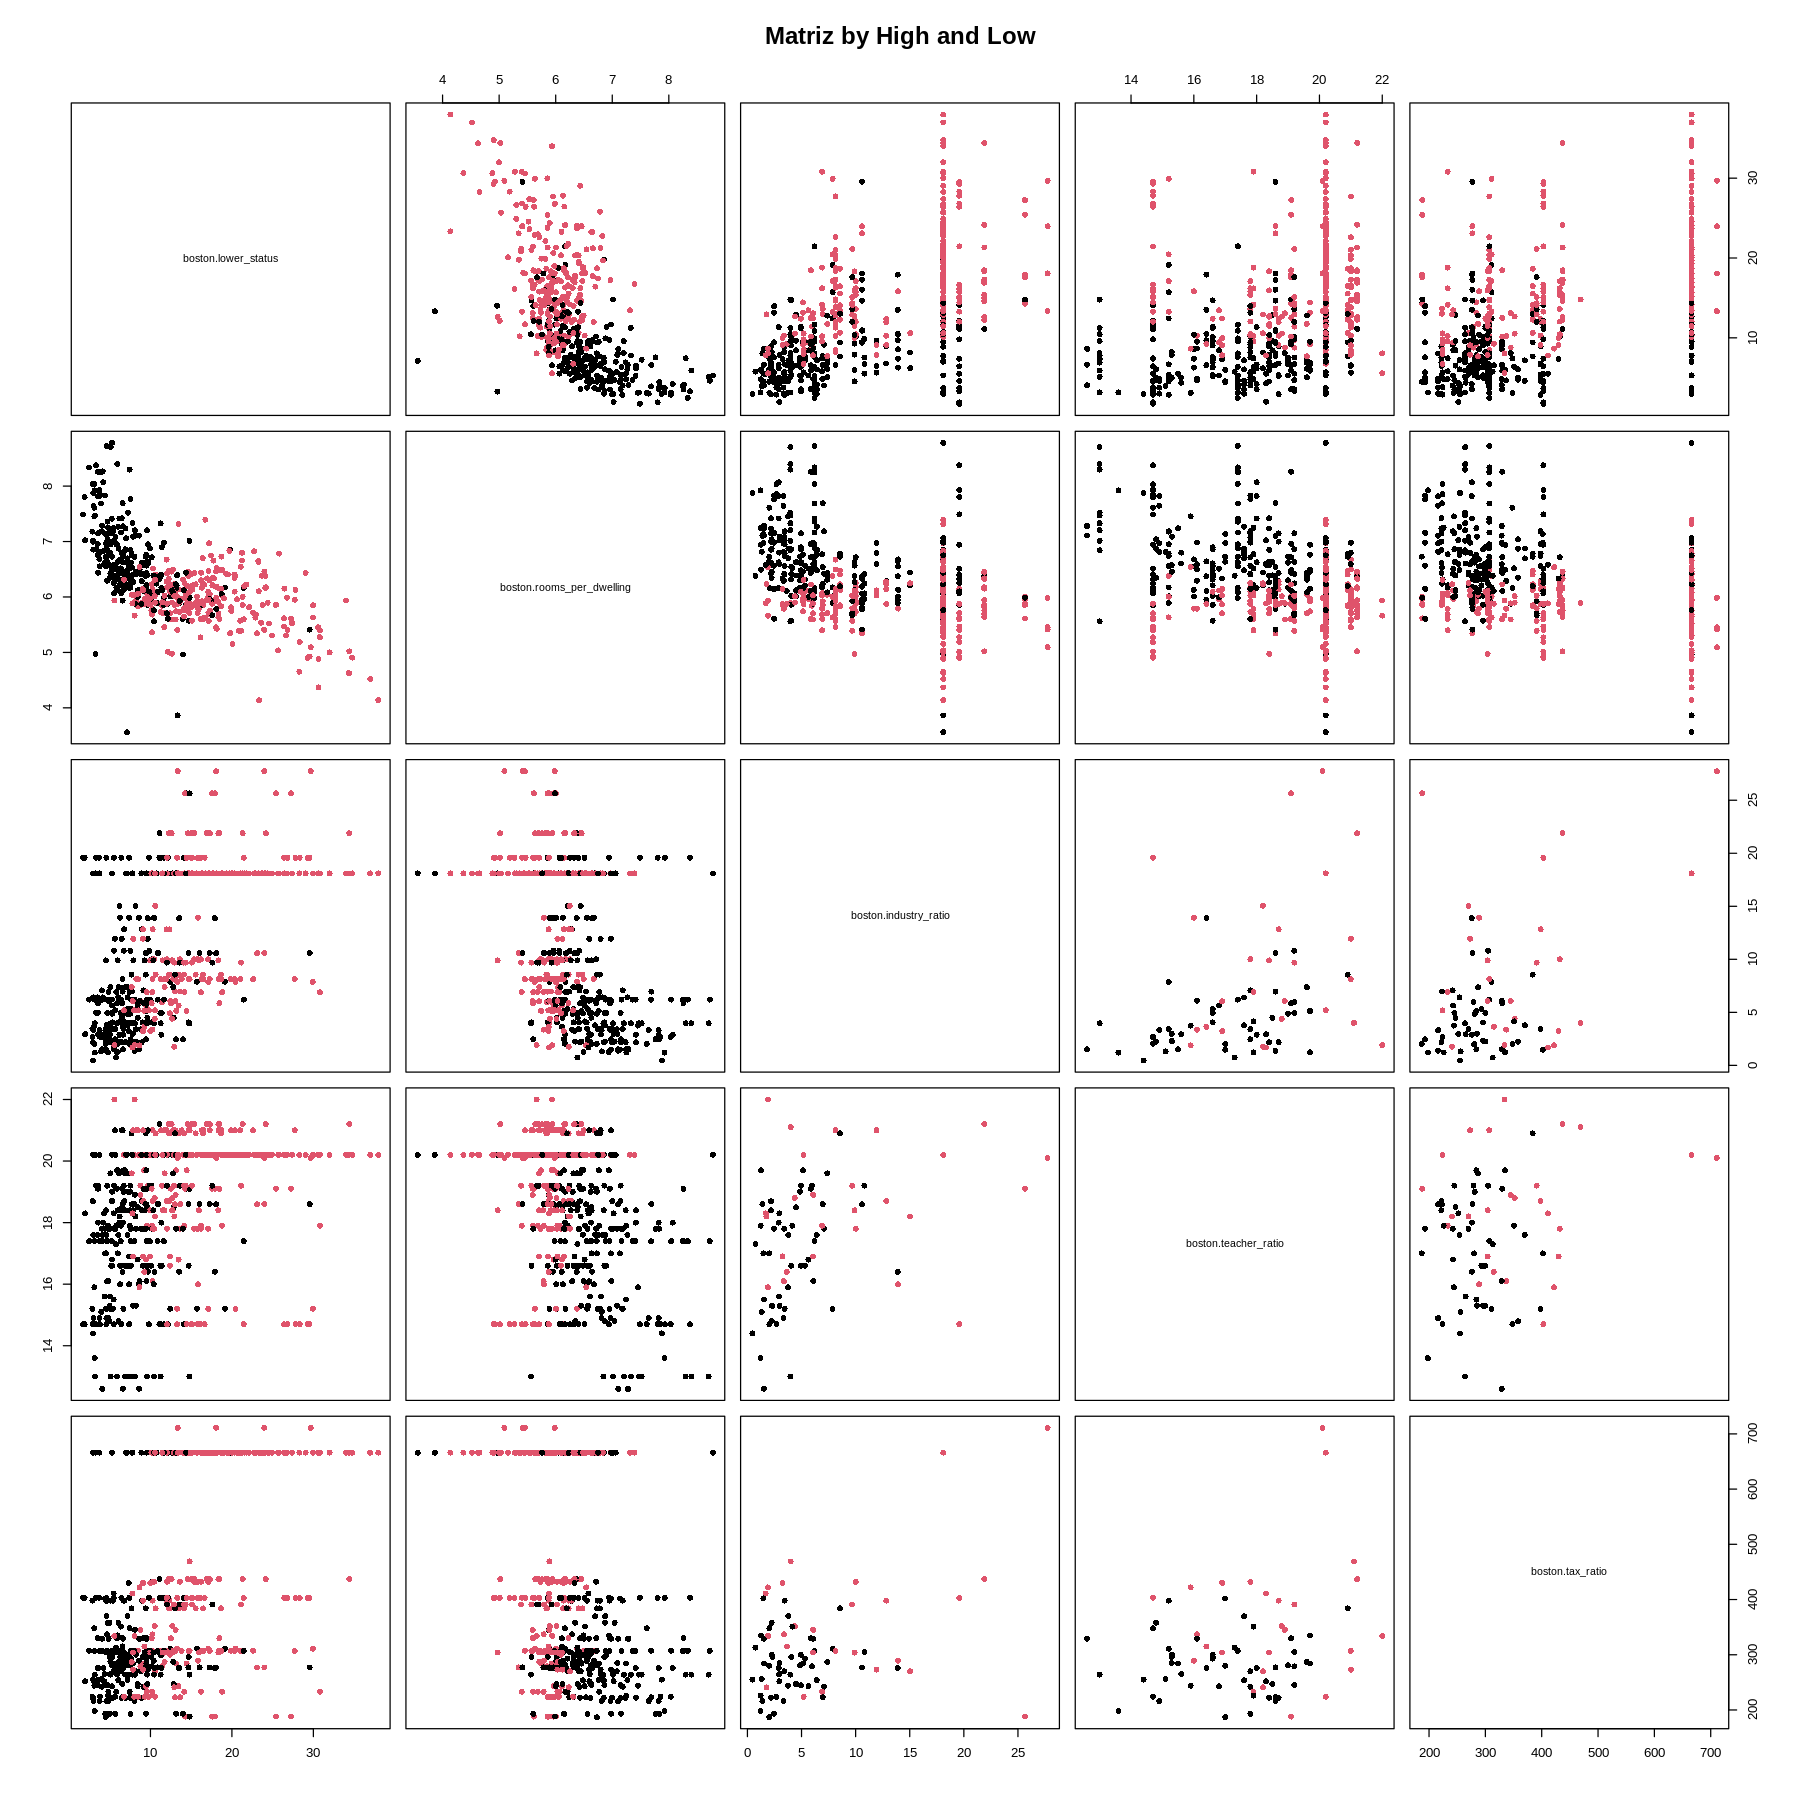

In [131]:
# Pairplot pintando por High y Low con las variables que hemos visto más correlacion

boston <- boston %>%
  mutate(median_category = ifelse(median_value > median(median_value), "High", "Low"))

boston$median_category <- as.factor(boston$median_category)

boston$median_category_numeric <- as.numeric(boston$median_category)

pairs(boston_pca2, pch = 16, main = "Matriz by High and Low", col = boston$median_category_numeric)


In [ ]:
# Supuestos del Test Anova

# Normalidad

variables <- c('median_value', 'lower_status', 'industry_ratio', 'rooms_per_dwelling', 'tax_ratio')
categories <- c('High', 'Low')
results <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categories) {
    data_subset <- subset(boston_anova, median_category == cat)
    result <- shapiro.test(data_subset[, variable])
    results <- rbind(results, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value,3)))
  }
}

print(results)

             Variable  Cat   Shapiro PValor
W        median_value High 0.8052495      0
W1       median_value  Low 0.9234817      0
W2       lower_status High 0.9045043      0
W3       lower_status  Low 0.9518154      0
W4     industry_ratio High 0.8542914      0
W5     industry_ratio  Low 0.8848598      0
W6 rooms_per_dwelling High 0.9487752      0
W7 rooms_per_dwelling  Low 0.9615078      0
W8          tax_ratio High 0.7491511      0
W9          tax_ratio  Low 0.8175598      0


In [ ]:
# Homocedasticidad

variables <- c('median_value', 'lower_status', 'industry_ratio', 'rooms_per_dwelling', 'tax_ratio')
results <- data.frame(Variable = character(), Cat = character(), Barlett = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  result = bartlett.test(get(variable) ~ median_category, data = boston_anova)
  results = rbind(results, data.frame(Variable = variable, bartlett = resultado_bartlett$statistic, PValor = round(resultado_bartlett$p.value,3)))
}

print(results)

                                Variable bartlett PValor
Bartlett's K-squared        median_value 121.7816      0
Bartlett's K-squared1       lower_status 121.7816      0
Bartlett's K-squared2     industry_ratio 121.7816      0
Bartlett's K-squared3 rooms_per_dwelling 121.7816      0
Bartlett's K-squared4          tax_ratio 121.7816      0


In [ ]:
# Test Anova

perform_anova <- function(data, continuous_vars, categorical_var) {
  results <- data.frame(Variable = character(), FValue = numeric(), PValue = numeric(), row.names = NULL)

  for (var in continuous_vars) {
    formula <- as.formula(paste(var, "~", categorical_var))
    anova_result <- aov(formula, data = data)

    results <- rbind(results, data.frame(Variable = var,
                                          FValue = summary(anova_result)[[1]][1, 4],
                                          PValue = round(summary(anova_result)[[1]][1, 5], 3)))
  }

  return(results)
}

continous_variables <- c('crime_index', 'urban_ratio', 'industry_ratio', 'nox_concentration', 'rooms_per_dwelling', 'dwelling_age', 'dwelling_dist',
 'tax_ratio', 'teacher_ratio', 'racial_index', 'lower_status')
categorical_variable <- 'median_category'

anova_results <- perform_anova(boston, continous_variables, categorical_variable)
print(anova_results)


             Variable    FValue PValue
1         crime_index  64.36873      0
2         urban_ratio  61.80377      0
3      industry_ratio 144.18525      0
4   nox_concentration 127.97884      0
5  rooms_per_dwelling 176.81232      0
6        dwelling_age 146.79335      0
7       dwelling_dist  42.12122      0
8           tax_ratio 128.67392      0
9       teacher_ratio 135.39738      0
10       racial_index  50.92703      0
11       lower_status 396.00374      0


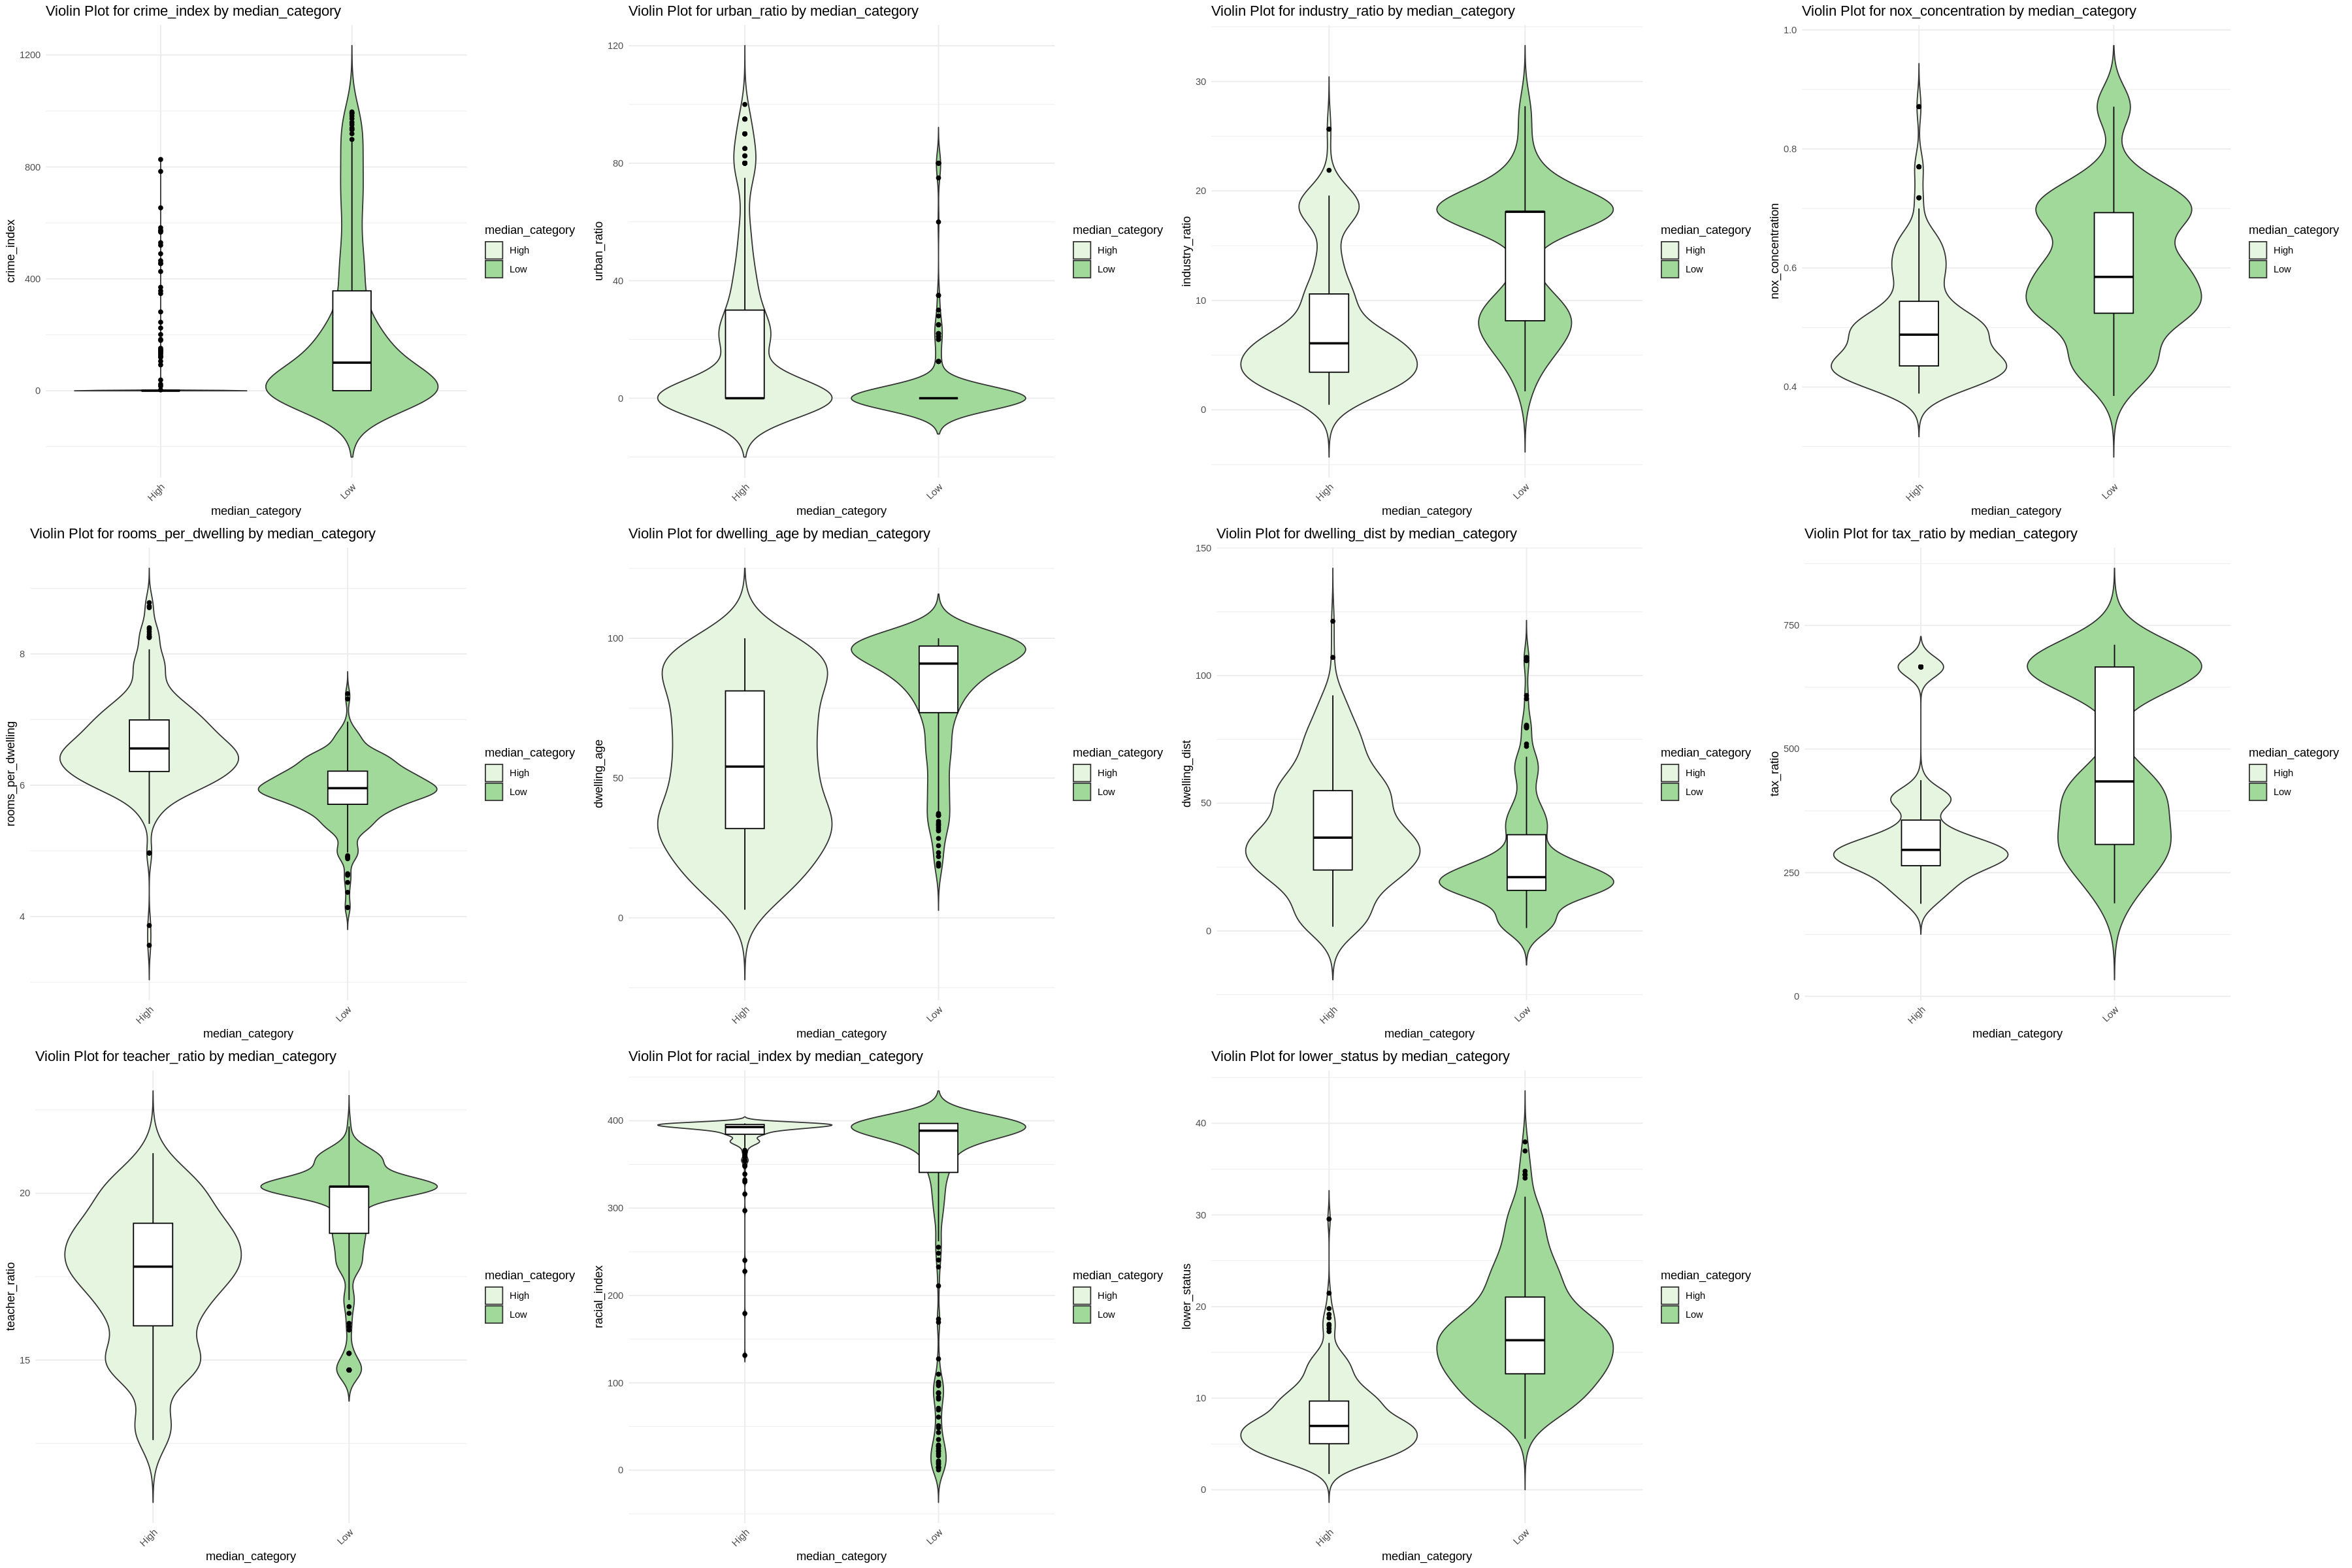

In [ ]:
# Graficamos para confirmar ANOVA

continous_variables <- c('crime_index', 'urban_ratio', 'industry_ratio', 'nox_concentration', 'rooms_per_dwelling', 'dwelling_age', 'dwelling_dist',
 'tax_ratio', 'teacher_ratio', 'racial_index', 'lower_status')
categorical_variable <- 'median_category'

graphs <- list()

for (var in continous_variables) {
    plot <- ggplot(boston, aes_string(x = categorical_variable, y = var, fill = categorical_variable)) +
      geom_violin(scale = "width", trim = FALSE) +
      geom_boxplot(width = 0.2, fill = "white", color = "black") +
      labs(title = paste("Violin Plot for", var, "by", categorical_variable),
           x = categorical_variable,
           y = var) +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
      scale_fill_brewer (palette = 'Greens')

    graphs[[var]] <- plot
  }

options(repr.plot.width = 30, repr.plot.height = 20)
grid.arrange(grobs = graphs, ncol = 4)


Se ha empezado comprobando todos los supuestos del test ANOVA, que podemos observar que no se cumplen para ninguna de las variables. Esto se ve porque todos los p-values son inferiores a 0.05, el nivel de significancia, siendo para el test de normalidad H0 que las distribuciones son normales y, para el test de homoscedasticidad, donde la hipótesis nula implica homoscedasticidad entre grupos.

A continuación, hemos realizado los tests. Empezando por el test numérico, hemos rechazado todas las hipótesis nulas aceptando de esta manera las alternativas que significa que hay diferencias significativas entre los grupos. Por otro lado, también el test visual nos ayuda a observar diferencias claras entre las distribuciones de los dos grupos creados por la variable categórica.

Podemos concluir que la variable creada tiene un impacto significativo en demás variables.

# 5. Desarrollo de las variables

Una vez hemos estudiado a fondo todas las variables:

Con las correlaciones hemos podido ver que tan solo 5 variables de todo el dataset tienen una correlación superior a 0.45, cosa que nos ayuda a empezar a intuir un poco qué variables serán importantes

Después con el PCA, al empezar haciéndolo con todas las variables nos hemos dado cuenta que nos generaba demasiados componentes impactantes y no parecía sostenible analizarlo todo. Al reducir el modelo a las 5 variables que tenían una correlación alta, hemos podido filtrar un poco más, elegir solo 5 variables y el resultado ha sido una reducción importante del número de componentes necesarios para explicar prácticamente toda la varianza de la variable objetivo (90%). Aun así, muchas de las variables restantes tenían impacto, así que ha merecido la pena hacer el test de ANOVA.

Al hacerlo, hemos visto que había diferencia entre los dos grupos creados (con la nueva variable categórica) con todas las variables, al fijarnos, hemos observado que siempre acabábamos rechazando la H0, siendo esta que las distribuciones eran iguales.

En definitiva, el primer filtro de correlaciones ha sido bastante bueno, porque después con el ANOVA hemos confirmado que estas variables generan diferencias en las distribuciones divididas y en el test del PCA hemos visto que todas las variables seleccionadas tenían un impacto similar (con diferencias, pero no insalvables) en alguno de los componentes que nos aportan más información sobre la varianza de la variable objetivo 'median_value'.

Las variables que usaremos para los modelos son:
- Lower_status
- Rooms_per_dwelling
- Industry_ratio
- Tax_ratio
- Teacher_ratio

# 5. Estudio de Regresón Lineal

**5.1. Creación del modelo**

In [98]:
boston_model = data.frame(boston$median_value
                            ,boston$lower_status
                            ,boston$rooms_per_dwelling
                            ,boston$industry_ratio
                            ,boston$teacher_ratio
                            ,boston$tax_ratio)

head(boston_model)

,boston.median_value,boston.lower_status,boston.rooms_per_dwelling,boston.industry_ratio,boston.teacher_ratio,boston.tax_ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,24.0,4.98,6.575,2.31,15.3,296
2,21.6,9.14,6.421,7.07,17.8,242
3,34.7,4.03,7.185,7.07,17.8,242
4,33.4,2.94,6.998,2.18,18.7,222
5,36.2,5.33,7.147,2.18,18.7,222
6,28.7,5.21,6.430,2.18,18.7,222


In [99]:
set.seed(123)
inTrain = createDataPartition(y = boston_model$boston.median_value
                              ,p = 0.6
                              , list = FALSE
                              , times = 1)
data_train  = boston_model[inTrain, ]
data_test = boston_model[-inTrain, ]

In [100]:
estandarizacion <- preProcess(data_train, method = c("center", "scale"))

data_train <- predict(estandarizacion, newdata = data_train)
data_test <- predict(estandarizacion, newdata = data_test)

In [101]:
modelo_boston = lm(boston.median_value ~ boston.lower_status + boston.rooms_per_dwelling + boston.industry_ratio + boston.teacher_ratio + boston.tax_ratio , data = data_train) # Entrenamos el modelo
summary(modelo_boston)


Call:
lm(formula = boston.median_value ~ boston.lower_status + boston.rooms_per_dwelling + 
    boston.industry_ratio + boston.teacher_ratio + boston.tax_ratio, 
    data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5967 -0.3193 -0.1001  0.1926  3.2582 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.705e-16  3.183e-02   0.000   1.0000    
boston.lower_status       -4.259e-01  4.723e-02  -9.017  < 2e-16 ***
boston.rooms_per_dwelling  3.822e-01  4.032e-02   9.480  < 2e-16 ***
boston.industry_ratio      6.290e-02  4.919e-02   1.279   0.2019    
boston.teacher_ratio      -1.975e-01  3.706e-02  -5.328 1.95e-07 ***
boston.tax_ratio          -8.816e-02  4.994e-02  -1.765   0.0785 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5569 on 300 degrees of freedom
Multiple R-squared:  0.695,	Adjusted R-squared:  0.6899 
F-statistic: 136.7 on 5 and 300 DF,  p-

Empezaremos haciendo el modelo con todas las variables que después de un análisis extenso nos parecen sospechosas de poder ser importantes. Vistos los resultados, podemos extraer ciertas conclusiones que probablemente nos ayuden a seguir mejorando este modelo:
- Para empezar el modelo no es demasiado bueno, ya que tiene una R-squared de 0.69 aproximadamente, es decir, nuestro modelo explica un 68,99% de la varianza de la variable median_value
- Relacionado con las variables y su importancia, podemos ver que tan solo 3 de las 5 son superiores al nivel de significancia, por lo tanto, podemos observar que las variables industry_ratio y tax_ratio no afectan significativamente a la predicción de los valores.
- En las demás variables, viendo el valor del p-value, podemos decir que si que tienen un impacto significativo en la variable objetivo. Lower_status y teacher_ratio afectan negativamente a la variable objetivo y rooms_per_dwelling lo hace positivamente.

Ahora vamos a probar un modelo con las variables que hemos visto que si tienen impacto en la variable objetivo. Veamos si los resultados mejoran:


In [102]:
modelo_boston2 = lm(boston.median_value ~ boston.lower_status + boston.rooms_per_dwelling + boston.teacher_ratio , data = data_train) # Entrenamos el modelo
summary(modelo_boston2)


Call:
lm(formula = boston.median_value ~ boston.lower_status + boston.rooms_per_dwelling + 
    boston.teacher_ratio, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6308 -0.3262 -0.0914  0.2037  3.1678 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.649e-16  3.190e-02   0.000        1    
boston.lower_status       -4.373e-01  4.098e-02 -10.670  < 2e-16 ***
boston.rooms_per_dwelling  3.721e-01  3.986e-02   9.335  < 2e-16 ***
boston.teacher_ratio      -2.129e-01  3.504e-02  -6.075 3.73e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.558 on 302 degrees of freedom
Multiple R-squared:  0.6917,	Adjusted R-squared:  0.6886 
F-statistic: 225.9 on 3 and 302 DF,  p-value: < 2.2e-16


Una vez hemos creado el modelo, podemos observar que aunque la relación entre la variable objetivo y las 'predictoras' se mantiene, la calidad del modelo no aumenta. Ya que el % de varianza de median_value explicado por el modelo sigue siendo prácticamente el mismo, un 68,86%.



**5.2. Supuestos del modelo**

**Normalidad**


	Shapiro-Wilk normality test

data:  modelo_boston2$residuals
W = 0.90612, p-value = 7.21e-13


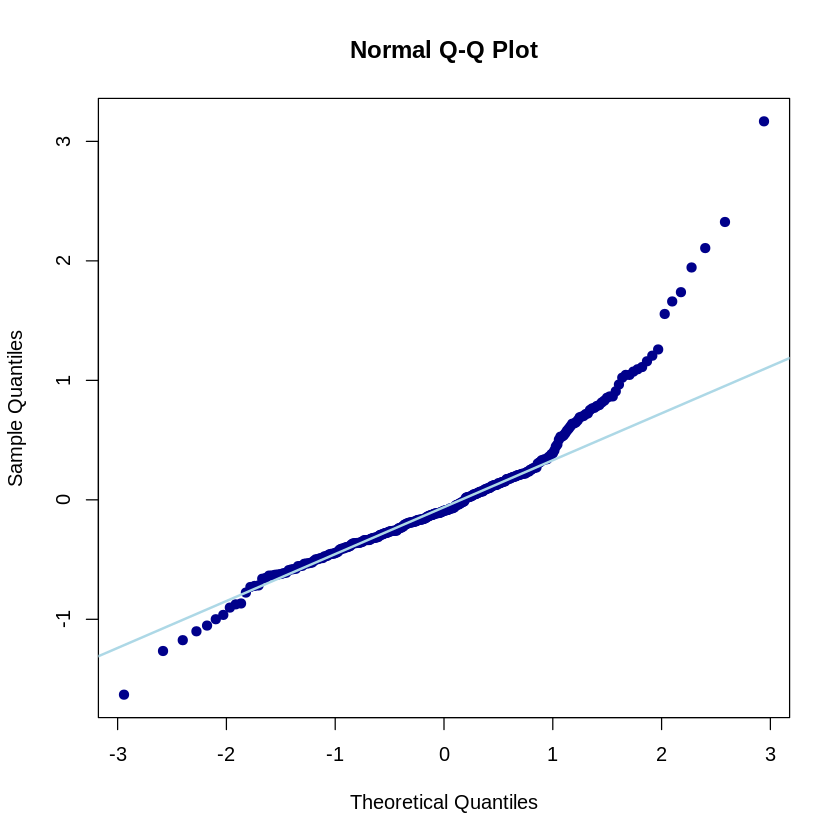

In [91]:
# Visualización
qqnorm(modelo_boston2$residuals,pch =19,col ="darkblue", cex = 1)
qqline(modelo_boston2$residuals , col = "lightblue", lwd = 2 )

# Test
shapiro.test(modelo_boston2$residuals)

Este primer supuesto de normalidad de los errors no se cumple. Lo vemos tanto en la prueba visual, donde se ve claramente que los puntos de la distribución estan distnaciados de la qqline, tanto en el test de shapiro, donde también se rechaza la hipótesis nula (siendo esta que la distribución de los errores es normal).

**Homocedasticidad**


	studentized Breusch-Pagan test

data:  modelo_boston2
BP = 2.2693, df = 3, p-value = 0.5184


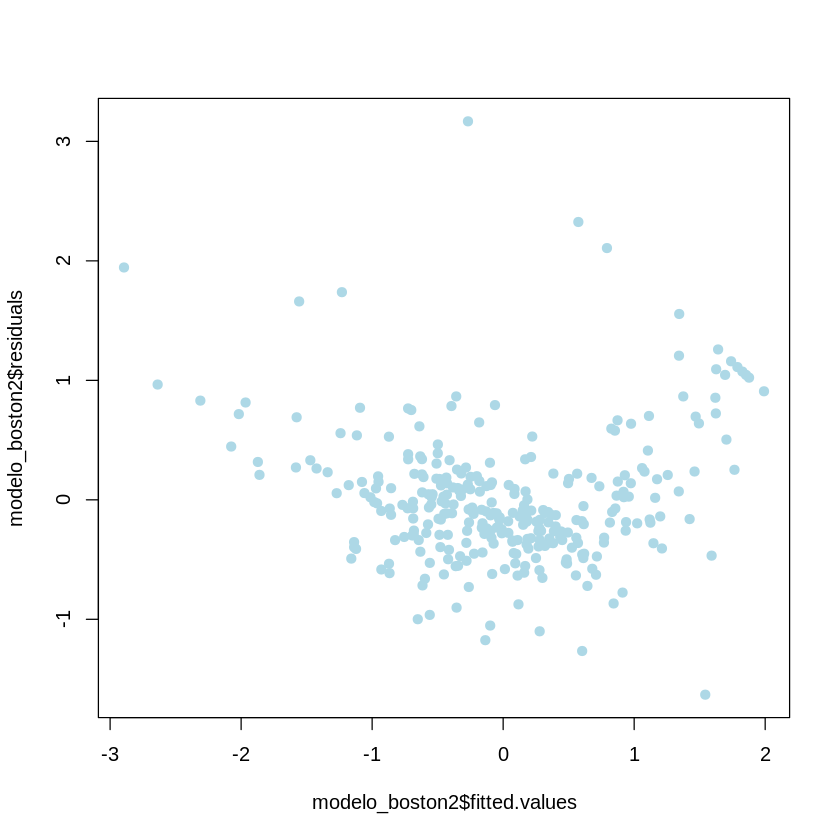

In [92]:
# Visualización
plot(modelo_boston2$fitted.values , modelo_boston2$residuals , pch =19,col ="lightblue", cex=1 )

# Test
bptest(modelo_boston2)

En este caso si que se cumple el supuesto, con el test observamos que el valor del p-value es mayor al nivel de significancia así que podemos aceptar la H0 de que los residuos son homocedásticos.

**Autocorrelación**


	Durbin-Watson test

data:  modelo_boston2
DW = 1.0555, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


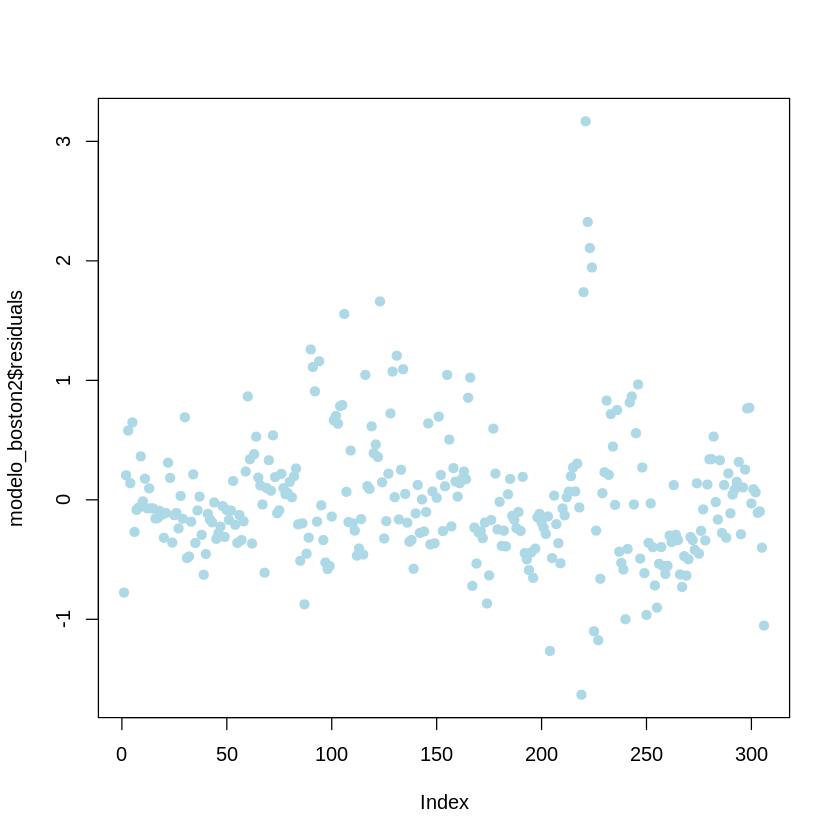

In [93]:
# Visualicación
plot(modelo_boston2$residuals, pch =19,col ="lightblue", cex=1)

# Test
dwtest(modelo_boston2, alternative = c("two.sided"))


Sobre la autocorrelación, visto el gráfico y comprobado que el test nos rechaza la hipótesis nula, podemos decir que no se cumple el supuesto. Los errores estan correlacionados.

**Media de los errores**

In [94]:
mean(modelo_boston2$residuals)

[1] -1.797083e-18

Este supuesto si que se cumple ya que la media es prácticamente 0.

**Outliers**

[1] 0.4111544

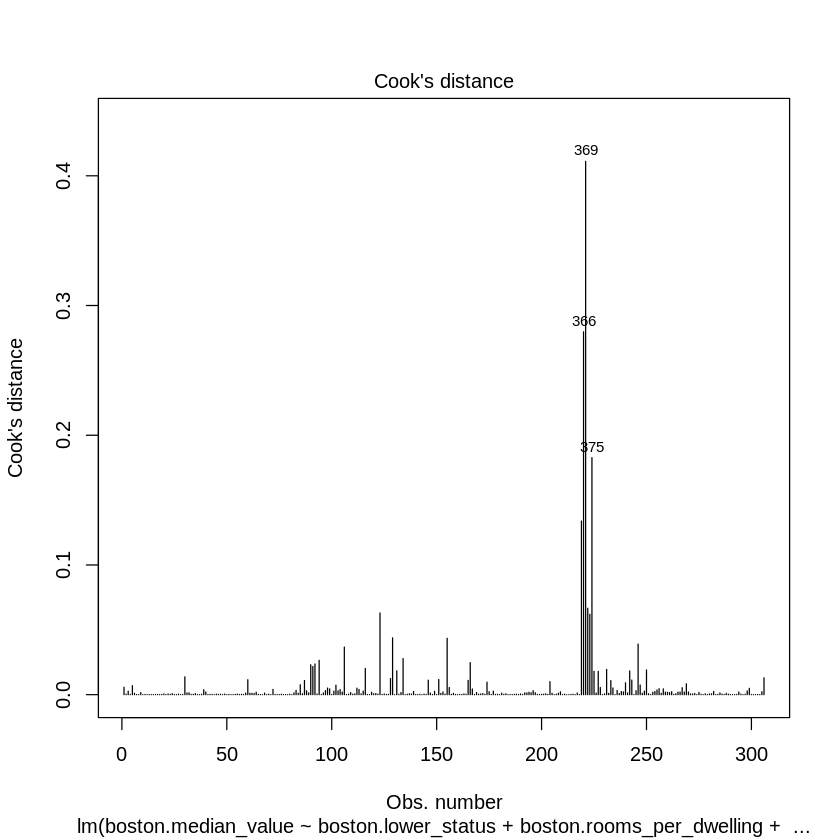

In [95]:
plot(modelo_boston2 , 4)
modelo_boston2 = augment(modelo_boston2)
max(modelo_boston2$.cooksd)

Con la distancia de Cook y este gráfico para los outliers, intentamos detectar la existencia de estos en nuestro modelo, para de esta forma, tener más información sobre la supuesta fiabilidad de este.

El supuesto de Cook dice que la distancia máxima de Cook, que es lo que calculamos con el test, tiene que ser inferior a 4/N siendo N el número de observaciones de la distribución. Teniendo en cuenta que nuestra muestra tiene 304 observaciones:
- 4/304 = 0.013
- Distancia máxima de Cook = 0.411

Podemos entender con esto que nuestro modelo contiene outliers, de hecho, también lo vemos en el gráfico.

**5.3. Validación del Modelo**

In [103]:
head(data_test)

,boston.median_value,boston.lower_status,boston.rooms_per_dwelling,boston.industry_ratio,boston.teacher_ratio,boston.tax_ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-0.1200054,-0.469416540,0.1644543,-0.5888977,-0.291037,-0.9774354
3,1.2727383,-1.210733794,1.2098857,-0.5888977,-0.291037,-0.9774354
7,0.0182058,0.007869912,-0.3952073,-0.4729782,-1.467010,-0.5738139
9,-0.6622186,2.546627633,-0.9165546,-0.4729782,-1.467010,-0.5738139
11,-0.8216931,1.171346308,0.1042462,-0.4729782,-1.467010,-0.5738139
12,-0.4070595,0.129730283,-0.3993124,-0.4729782,-1.467010,-0.5738139


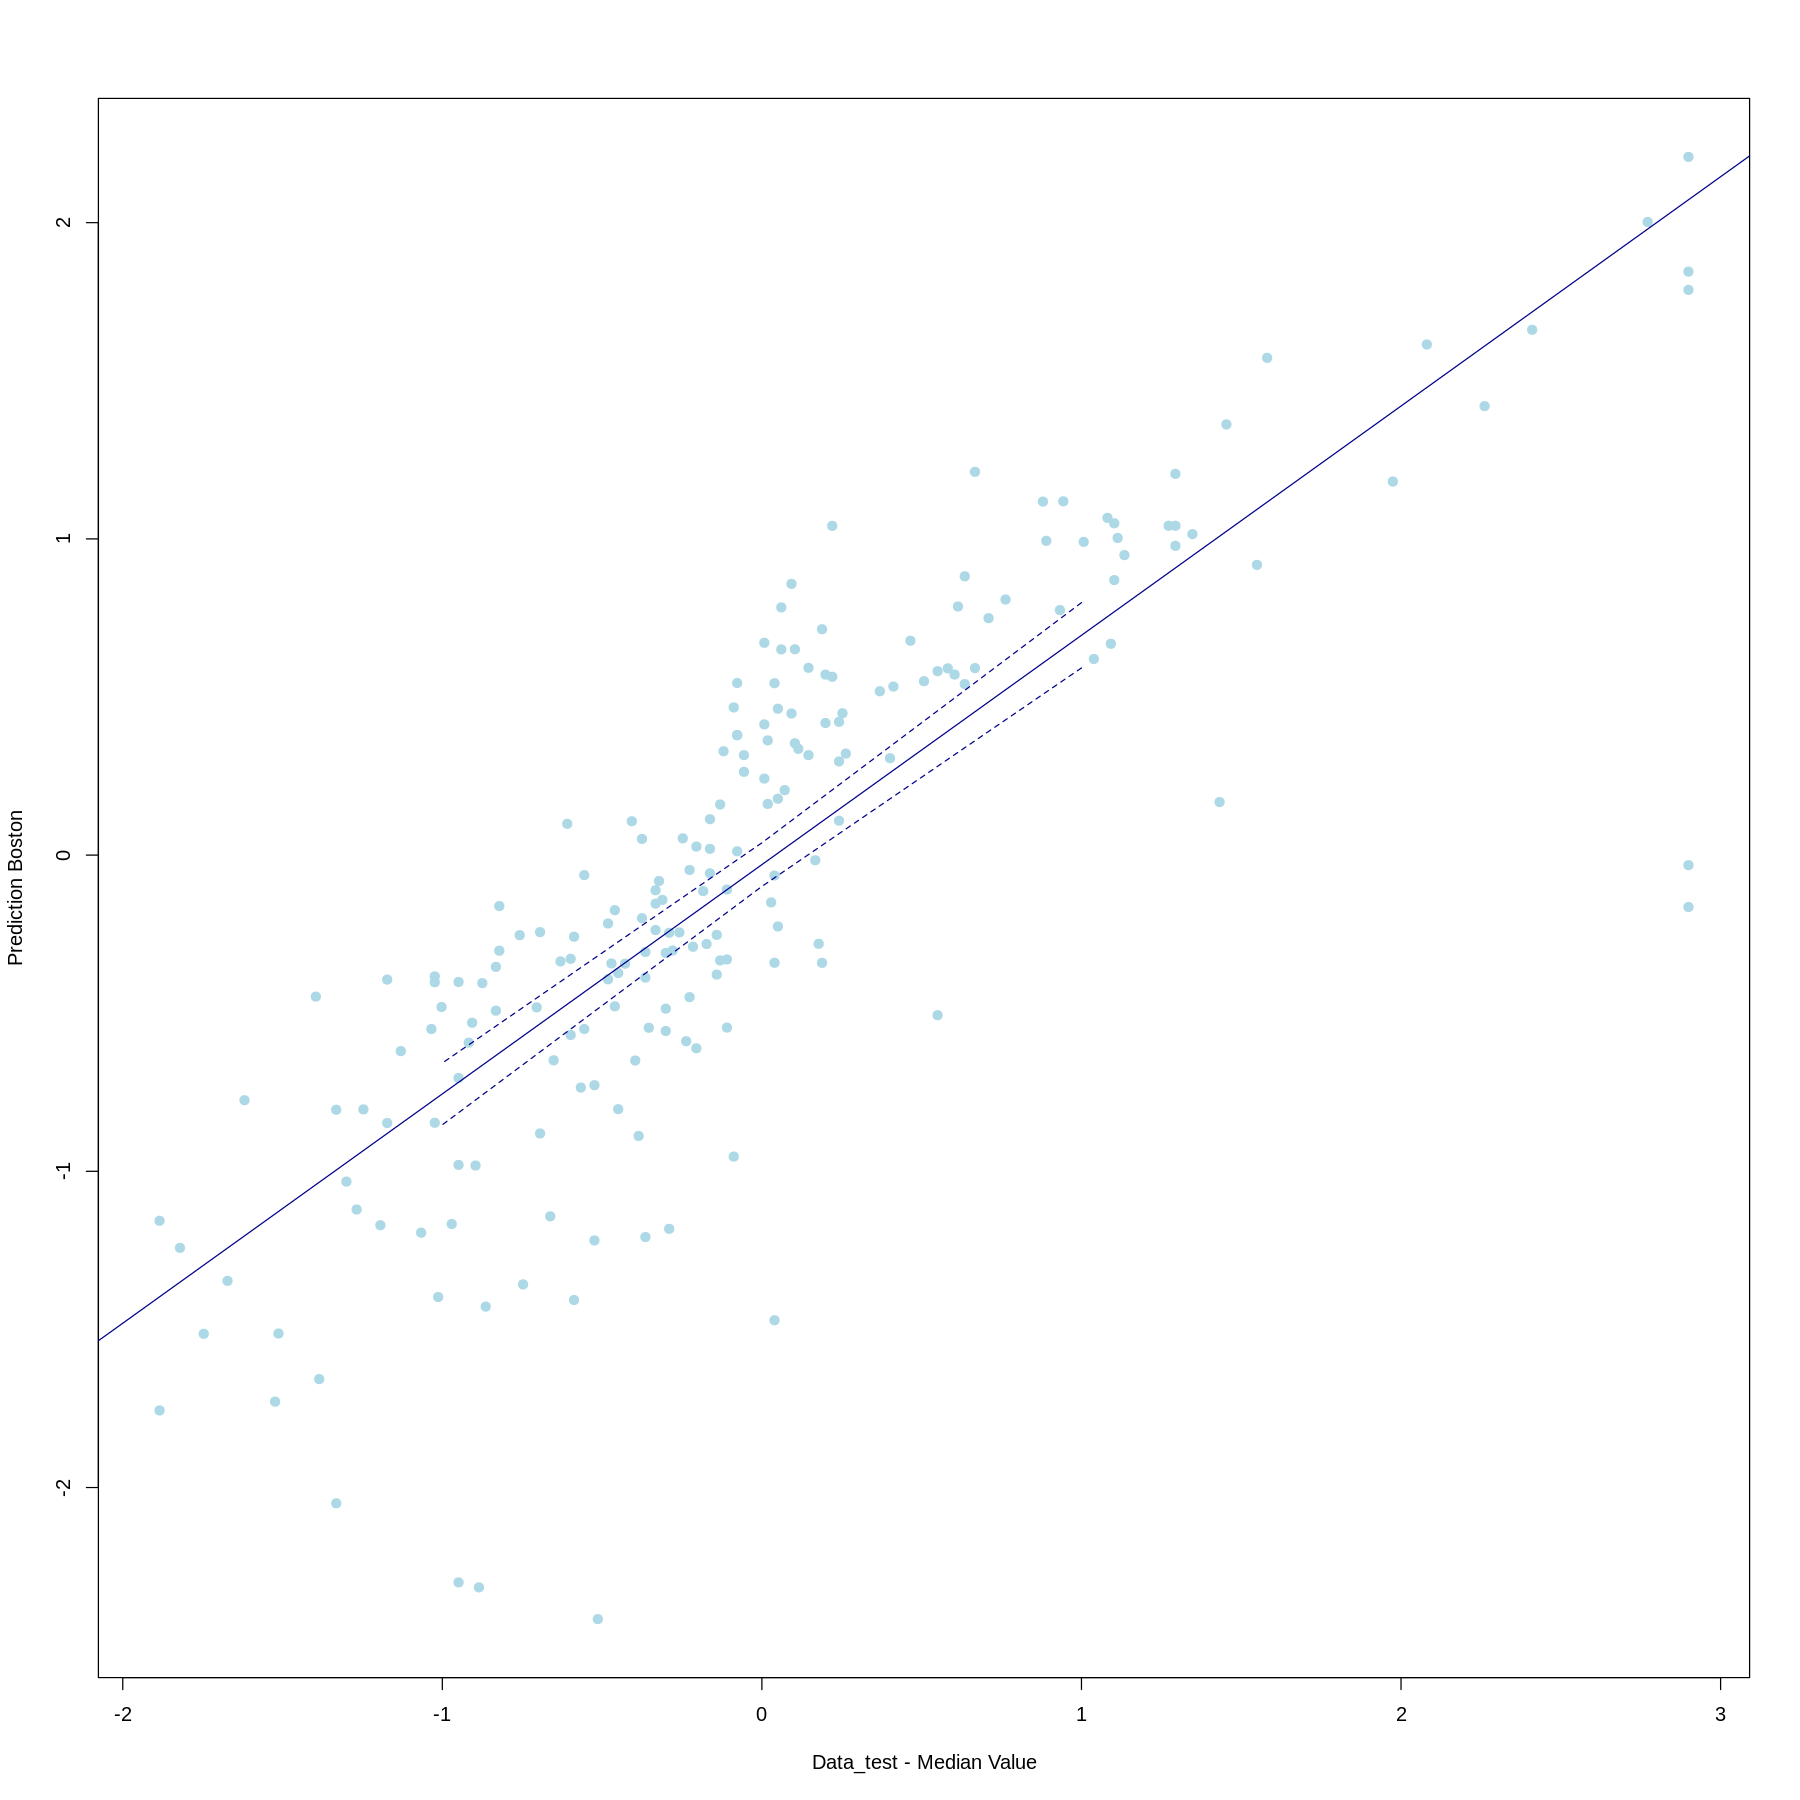

In [125]:
prediction_boston = predict(modelo_boston2, data_test)

plot(data_test$boston.median_value, prediction_boston, xlab = 'Data_test - Median Value', ylab = 'Prediction Boston', pch = 19, col = 'lightblue', cex = 1)

# Regresion
lm.out = lm(prediction_boston ~ boston.median_value, data = data_test)
newx = seq(min(data_test$boston.median_value, max(data_test$boston.median_value), by = 0.05))
conf_interval = predict(lm.out, newdata = data.frame(boston.median_value=newx), interval = 'confidence', level = 0.95)
abline(lm.out, col = 'darkblue')

# Intervalos de Confianza
lines(newx, conf_interval[,2], col = 'darkblue', lty = 2)
lines(newx, conf_interval[,3], col = 'darkblue', lty = 2)


In [105]:
data.frame( R2 = R2(prediction_boston, data_test$boston.median_value),
            RMSE = RMSE(prediction_boston, data_test$boston.median_value),
            MAE = MAE(prediction_boston, data_test$boston.median_value))

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.6591304,0.5555355,0.3805936


In [88]:
summary(data_test$boston.median_value)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.88486 -0.60109 -0.16253 -0.05271  0.24147  2.89938 

Viendo los resultados al validar nuestro modelo con el testing data set, podemos ver que las predicciones de nuestro modelo y de las variables predictoras nos explican el 65.91% de la varianza de la variable objetivo median_value.

Para poner en contexto nuestros errores, hace falta ver que el rango de nuestra variable objetivo una vez normalizada, que es de -1.88 a 2.89. Teniendo en cuenta esto, y que el error a escala es de 0.55, podemos decir que es relativamente bajo.

Por último, también hemos graficado el modelo con los intervalos de confianza y la regresión. Aquí se observa mucha dispersión en el gráfico y bastantes puntos que se alejan de la regresión creada. Esto nos ayuda a entender que las predicciones tienen un porcentaje relativamente bajo de acierto.

Valorar un modelo siempre implica conocimiento del dominio y del uso que vamos a hacer de este modelo, ya que no es lo mismo un modelo económico que nos puede ayudar a invertir (necesitamos saber qué perdidas supondrían nuestros errores) que un modelo clínico que nos ayudará a tomar decisiones sobre la vida o muerte de los pacientes (en este caso, las perdidas en caso de error son fatales). Dicho esto, no parece que nuestro modelo sea excesivamente fiable, ya que la predicción es bastante baja.

# 6. Conclusiones

Después de un extenso análisis del dataset, entendiendo nuestras variables y perfilando el trato que debíamos hacer de cada una de ellas, hemos empezado a aplicar muchos de los métodos que hemos visto en clase para obtener la máxima información de ellas y de su relación o impacto en la variable objetivo. De esta forma hemos ido mejorando nuestro modelo.

Los métodos usados para la selección de variables han sido, primero, el estudio de correlaciones, donde hemos visto como de relacionadas estaban las variables entre sí y como lo estaban con la variable objetivo.

Después hemos aplicado el estudio de componentes, analizando que cantidad de componentes eran necesarios para describir bien la mayor parte posible de la varianza de 'median value' y luego fijándonos en la composición de estos para seleccionar variables.

También hemos usado los tests ANOVA para ver de una manera certera si las variables tenían un impacto significante en la variable categórica que hemos creado a partir de nuestra variable objetivo y si había diferencias significativas.

Y una vez hemos reducido bastante la cantidad de variables y ya empezando a intuir por donde irían los tiros, nos hemos puesto a crear nuestro modelo. Al hacerlo, hemos visto que el impacto de las variables era desigual a la hora de darnos información sobre median value, así que hemos decidió eliminar algunas de ellas y perfeccionar el modelo.

El segundo modelo es el que hemos acabado definiendo como definitivo, y pese a que no hace grandes predicciones, tan solo nos explica un 66% de la varianza de la variable objetivo, sí que cumple con ciertos supuestos y tiene unos errores relativamente pequeños.

La realidad es que deberíamos valorar el caso de uso en concreto del model, sabiendo el coste que tiene equivocarse en estas predicciones y si nos merecería la pena basándonos en el beneficio potencial de acertar en los demás casos.